In [2]:
data = "https://raw.githubusercontent.com/itsareebah/StudentFeedbackAnalysis/main/Students'%20feedback%20Proforma%202022.csv"

# Importing Data and Libraries



In [3]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder

df = pd.read_csv(data)

In [4]:
df.head(2)

Timestamp Programme of Study Faculty of Your study  \
0  2022/04/07 6:26:50 PM GMT+5:30            Masters       Social Sciences   
1  2022/04/07 6:30:06 PM GMT+5:30            Masters       Social Sciences   

   Name of the Department  Semester of Study  Residence Gender Category  \
0       Political science                 IV  PG/Rented   Male  General   
1        Political science                IV      Local   Male       SC   

  Academic [Content of Syllabi of the courses]  \
0                                    Excellent   
1                                Below Average   

  Academic [Experience with extend and delivery of syllabus covered in the class]  \
0                                          Excellent                                
1                                      Below Average                                

   ...  \
0  ...   
1  ...   

  Skills developed during course of study [Clarity of Career Perspective]  \
0                                               Good                        
1                                      Below Average                        

  Skills developed during course of study [IT Skills]  \
0                                               Good    
1                                      Below Average    

  Skills developed during course of study [Communication Skills]  \
0                                               Good               
1                                             Averge               

  Skills developed during course of study [Time Management]  \
0                                               Good          
1                                      Below Average          

  Skills developed during course of study [Problem Siolving Skills]  \
0                                               Good                  
1                                      Below Average                  

  Skills developed during course of study [Leadership Qualities]  \
0                                               Good               
1                                      Below Average               

  Skills developed during course of study [Critical Thinking]  \
0                                               Good            
1                                      Below Average            

  Overall University Experience [Your Overall academic experience]  \
0                                          Very Good                 
1                                      Below Average                 

  Overall University Experience [Would you recommend this University to others including ]  \
0                                          Excellent                                         
1                                            Average                                         

  Suggestions, if any:  
0   Build more hostels  
1                   No  

[2 rows x 58 columns]

In [5]:
df.columns

Index(['Timestamp', 'Programme of Study', 'Faculty of Your study',
       ' Name of the Department ', 'Semester of Study', 'Residence', 'Gender',
       'Category', 'Academic [Content of Syllabi of the courses]',
       'Academic [Experience with extend and delivery of syllabus covered in the class]',
       'Academic [Use  of teaching aids and ICT in the class to facilitate teaching ]',
       'Academic [Experience with Internal assessement]',
       'Academic [Student Teacher Interaction]',
       'Academic [Use of non-traditional methods of evaluation like quiz, assignments, seminar, presentation etc.]',
       'Academic [Integration of theory and practical classes]',
       'Academic [Stimulation for innovative thinking]',
       'Academic [Overall Learning experience]',
       'Academic [Condition of Lab Equipment ]',
       'Academic [Availability of Online resources]',
       'Academic [Research facilities in the Department for research projects/M.Phil./Ph.D.]',
       'Academic

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 58 columns):
 #   Column                                                                                                      Non-Null Count  Dtype 
---  ------                                                                                                      --------------  ----- 
 0   Timestamp                                                                                                   2333 non-null   object
 1   Programme of Study                                                                                          2333 non-null   object
 2   Faculty of Your study                                                                                       2333 non-null   object
 3    Name of the Department                                                                                     2333 non-null   object
 4   Semester of Study                                                       

In [8]:
df.isnull().sum()
# no null values in data except in suggestions

Timestamp                                                                                                       0
Programme of Study                                                                                              0
Faculty of Your study                                                                                           0
 Name of the Department                                                                                         0
Semester of Study                                                                                               0
Residence                                                                                                       0
Gender                                                                                                          0
Category                                                                                                        0
Academic [Content of Syllabi of the courses]                                            

## Analysis
- Explore data variables and its null and illegal values
- Compute wrong values and replace
- correlation among variables
- Average ratings for each skill developed
- Distribution of Overall Academic Experiences
- Strengths and Weaknesses of Academic Experiences across Faculties
- Gender category and residence distribution
- Distribution of Residence among different Faculty of Students
- Word Cloud of Suggestions

## DATA CLEANING
- replacing illegal values with null in suggestions
- replacing multiple inputs with final in programme name and faculty
- addressing wrong values in dept name

In [9]:
# Cleaning out null values from suggestiongs
null_val = {' ' : ['nan', 'NA' ,0, -1, '-', '--', '---', 'No', 3, '**', '.', '..', '....', '__', 'Abc', 'N', 'N.A.',
                   'N.A', 'N. A.', 'N/a', 'NO', 'N9', 'Na', 'Ni', 'Nil', 'Nik', 'No.', 'Non', 'None.', 'None','Obe',
                   ]}


for _, variations in null_val.items():
    df['Suggestions, if any:'].replace(variations, np.nan, inplace=True)

In [10]:
df[df['Suggestions, if any:'].isnull()].head(3)

Timestamp Programme of Study Faculty of Your study  \
1   2022/04/07 6:30:06 PM GMT+5:30            Masters       Social Sciences   
12  2022/04/07 6:39:33 PM GMT+5:30            Masters       Social Sciences   
13  2022/04/07 6:42:33 PM GMT+5:30            Masters                  Arts   

             Name of the Department  Semester of Study  Residence  Gender  \
1                  Political science                IV      Local    Male   
12  Department of political science                 IV  PG/Rented  Female   
13   Department of Political Science                IV      Local    Male   

   Category Academic [Content of Syllabi of the courses]  \
1        SC                                Below Average   
12  General                                    Very Good   
13  General                                      Average   

   Academic [Experience with extend and delivery of syllabus covered in the class]  \
1                                       Below Average                                
12                                          Excellent                                
13                                      Below Average                                

    ...  \
1   ...   
12  ...   
13  ...   

   Skills developed during course of study [Clarity of Career Perspective]  \
1                                       Below Average                        
12                                          Very Good                        
13                                               Good                        

   Skills developed during course of study [IT Skills]  \
1                                       Below Average    
12                                          Very Good    
13                                             Averge    

   Skills developed during course of study [Communication Skills]  \
1                                              Averge               
12                                          Very Good               
13                                             Averge               

   Skills developed during course of study [Time Management]  \
1                                       Below Average          
12                                          Very Good          
13                                             Averge          

   Skills developed during course of study [Problem Siolving Skills]  \
1                                       Below Average                  
12                                          Very Good                  
13                                             Averge                  

   Skills developed during course of study [Leadership Qualities]  \
1                                       Below Average               
12                                          Very Good               
13                                             Averge               

   Skills developed during course of study [Critical Thinking]  \
1                                       Below Average            
12                                          Very Good            
13                                             Averge            

   Overall University Experience [Your Overall academic experience]  \
1                                       Below Average                 
12                                          Very Good                 
13                                            Average                 

   Overall University Experience [Would you recommend this University to others including ]  \
1                                             Average                                         
12                                          Very Good                                         
13                                            Average                                         

   Suggestions, if any:  
1                   NaN  
12                  NaN  
13                  NaN  

[3 rows x 58 columns]

In [11]:
# before
print(df['Programme of Study'].value_counts())
df['Programme of Study'].replace('UG;Masters', 'Masters', inplace = True)
df['Programme of Study'].replace('Masters;Ph.D', 'Ph.D', inplace = True)
df['Programme of Study'].replace('Masters;M.Phil', 'M.Phil', inplace = True)
df['Programme of Study'].replace('UG;Masters;M.Phil;Ph.D', 'Ph.D', inplace = True)

# after
print('\n', df['Programme of Study'].value_counts())

Masters                   1731
UG                         274
Ph.D                       255
M.Phil                      60
UG;Masters                   4
Masters;Ph.D                 4
Masters;M.Phil               3
UG;Masters;M.Phil;Ph.D       2
Name: Programme of Study, dtype: int64

 Masters    1735
UG          274
Ph.D        261
M.Phil       63
Name: Programme of Study, dtype: int64


In [12]:
# before
print('\n', df['Faculty of Your study'].value_counts())
val = df['Faculty of Your study'].unique()

for i in val:
    df['Faculty of Your study'].replace( i , i.split(';')[0], inplace = True)

# after
print('\n', df['Faculty of Your study'].value_counts())


 Science                                  627
Social Sciences                          450
Arts                                     450
Mathematical Sciences                    162
Music and Fine Arts                      154
Management Studies                       129
Commerce                                 113
Law                                      102
Education                                 72
Interdisciplinary                         25
Social Sciences;Arts                      14
Management Studies;Commerce               10
Science;Interdisciplinary                  6
Science;Mathematical Sciences              5
Science;Social Sciences                    4
Arts;Education                             2
Education;Mathematical Sciences            2
Arts;Management Studies                    2
Science;Law                                1
Education;Management Studies;Commerce      1
Social Sciences;Music and Fine Arts        1
Science;Arts                               1
Name: Fa

In [13]:
# Name of the Department
depts = ['political science', 'law', 'sociology', 'psychology', 'commerce', 'botany', 'mba','chemistry', 'sanskrit',
        'finance', 'geography', 'economics', 'african Studies', 'romance studies', 'financial studies', 'physics',
        'music', 'statistics', 'punjabi', 'Philosophy', 'East Asian', 'Microbiology', 'Zoology', 'Social Work',
        'Electronic', 'computer science', 'biology', 'education', 'cluster Innovation centre', 'geology', 'anthropology',
        'Biomedical', 'programme', 'genetics', 'chemistry', 'Persian', 'Social Science']
# before
val = df[' Name of the Department '].unique()
for i in val:
    for j in depts:
        if j.lower() in i.lower():
            df[' Name of the Department '].replace( i , j, inplace = True)

In [14]:
department_mapping = {
    'Political Science': ['political science', 'Department of political t', 'Department  of Political  science',
                         'Department of Political’s Science ', 'Pol science', 'DEPARTMENT OF POLITICAL SCENCE',
                         'Political  Science ', 'Department of polu'],

    'Germanic and Romance Studies': ['Germanic and romance department ', 'GRS', 'Germen nd romanic study',
                                     'Department of Germanic and roman studies', 'Germen nd romanic study',
                                     'Department of Germanic and Romance Languages', 'DGRS', 'romance studies',
                                    'Department of Romance and Germanic Studies', 'Germen nd romanic study ',
                                     'Department of Germanic and Romance Study ', 'GRS ', 'grs', 'Grs'],

    'Cluster Innovation Centre': ['Cluster innovation centre', 'Cluster Innovation Centre ',
                                  'CLUSTER INNOVATION CENTRE', 'Cluster Inovation Centre (Mathematics Education)',
                                  'CIC , MME', 'Cluster Innovation Centre', 'Clc', 'CIE'],

    'Indian Literature':['Department  of Modern Indian Languages and Literary Studies',
                        'Comparative Indian ', 'Indian Literature', 'M.A. Compatitive Indian literature',
                         'Department of Modern Indian Languages and Literary studies '],

    'Arabic':['Deptt. Of Arabic',  'Department of Arabic ', 'Department of arabic ',  'Arabic ',
                  'Deptt.of Arabic', 'ARABIC', 'Arabic department', 'Department of Arabic'],

    'East asian':['East aisan department '],
    'education':['डिपार्टमेंट ऑफ एजुकेशन', ],
    'chemistry' :['chemistry', 'Chemsitry'],
    'Computer Science':['computer science', 'DUCS', 'DUCS ','Computer Science',],
    'ACBR':['ACBR,DU', 'Acbr', 'Acbr , du', 'ACBR', 'ACBR University of Delhi', 'ACBR '],
    'DFBE':[ 'DFBE', 'DFBE ' ,'Dfs', 'DFS', 'Dfbe'],
    'Commerce':['financial studies', 'finance', 'M.Com', 'M.com', 'Conmerce'],
    'LAW':['LC-1', 'Llm', 'LL.M.', 'LLM (2-Years)'],
    'Department of Arts':['programme' 'BA program','Ba program ',  'BA prog', 'Fine arts', 'BA program', 'programme']
}

for standard_name, variations in department_mapping.items():
    df[' Name of the Department '].replace(variations, standard_name, inplace=True)

df = df.groupby(' Name of the Department ').filter(lambda x : len(x)>10).reset_index()

print('\n', df[' Name of the Department '].unique())


 ['Political Science' 'law' 'geography' 'Germanic and Romance Studies'
 'punjabi' 'sociology' 'botany' 'Electronic' 'East Asian' 'Philosophy'
 'Social Work' 'psychology' 'economics' 'ACBR' 'Biomedical' 'Arabic'
 'geology' 'commerce' 'anthropology' 'Commerce' 'chemistry'
 'Computer Science' 'education' 'statistics' 'biology' 'sanskrit' 'music'
 'physics' 'african Studies' 'DFBE' 'Zoology']


In [15]:
print('\n', df['Semester of Study'].value_counts())
val = df['Semester of Study'].unique()
for i in val:
    df['Semester of Study'].replace(i, i.split(';')[-1], inplace=True)
df['Semester of Study'].value_counts()


 IV                            874
I                             572
II                            447
VI                            108
Beyond VI                     104
III                            61
V                              31
I;II                           25
I;II;III;IV                    22
I;II;III;IV;V;VI                4
IV;V                            3
II;III                          3
III;IV                          2
III;VI                          2
IV;VI                           2
V;VI                            1
IV;Beyond VI                    1
I;II;III;IV;V;VI;Beyond VI      1
II;IV                           1
I;II;III                        1
Name: Semester of Study, dtype: int64


IV           899
I            572
II           472
VI           117
Beyond VI    106
III           65
V             34
Name: Semester of Study, dtype: int64

In [16]:
print('\n', df['Residence'].value_counts())
val = df['Residence'].unique()
for i in val:
    df['Residence'].replace(i, i.split(';')[0], inplace=True)
df['Residence'].value_counts()


 PG/Rented           988
Local               563
NCR                 396
Other               174
Hostel              115
Local;NCR            13
Hostel;PG/Rented      4
PG/Rented;Local       3
PG/Rented;Other       3
Local;Other           2
Hostel;Other          1
NCR;Other             1
PG/Rented;NCR         1
Hostel;Local;NCR      1
Name: Residence, dtype: int64


PG/Rented    995
Local        578
NCR          397
Other        174
Hostel       121
Name: Residence, dtype: int64

In [17]:
print(df['Category'].value_counts())

val = df['Category'].unique()
for i in val:
    df['Category'].replace(i, i.split(';')[-1], inplace=True)
df['Category'].value_counts()

General            1053
OBC                 572
SC                  259
EWS                 181
ST                  113
PwD                  31
Other                20
General;EWS          15
General;PwD           5
General;OBC           4
General;Other         2
ST;PwD                2
OBC;PwD               2
SC;PwD                2
EWS;PwD               2
OBC;SC                1
General;OBC;EWS       1
Name: Category, dtype: int64


General    1053
OBC         576
SC          260
EWS         197
ST          113
PwD          44
Other        22
Name: Category, dtype: int64

In [18]:
df1 = df.copy()

## Encoding ratings data accordingly

In [19]:
df['Overall University Experience [Would you recommend this University to others including ]'].value_counts()

Good              680
Excellent         519
Very Good         512
Average           325
Below Average     146
Don't Know         68
Not Applicable     15
Name: Overall University Experience [Would you recommend this University to others including ], dtype: int64

In [20]:
# Replace function using a dictionary for columns where order matters

ordinal_encoding_dict = {
    'Semester of Study': {
        'IV': 4,
        'I': 1,
        'II': 2,
        'VI': 6,
        'Beyond VI': 7,
        'III': 3,
        'V': 5
    },

    'rating' : {
    5 : ['Excellent'],
    4 : ['Very Good'],
    3 : ['Good'],
    2 : ['Average', 'Averge'],
    1 : ['Below Average'],
    0 : ["Don't Know", "Don't know"],
    -1 : ['Not Applicable', 'Not  Applicable', 'Not applicable'],
},
    'Programme of Study': {
        'Masters': 2,
        'UG': 1,
        'Ph.D': 4,
        'M.Phil': 3
    }
}

for column, encoding in ordinal_encoding_dict.items():
    if column == 'rating':
        for key, value in encoding.items():
            df.replace(value, key, inplace=True)
    else:
        df.replace({column: encoding}, inplace=True)

In [21]:
df.head(3)

index                       Timestamp  Programme of Study  \
0      0  2022/04/07 6:26:50 PM GMT+5:30                   2   
1      1  2022/04/07 6:30:06 PM GMT+5:30                   2   
2      2  2022/04/07 6:30:33 PM GMT+5:30                   2   

  Faculty of Your study  Name of the Department   Semester of Study  \
0       Social Sciences        Political Science                  4   
1       Social Sciences        Political Science                  4   
2       Social Sciences        Political Science                  4   

   Residence Gender Category  Academic [Content of Syllabi of the courses]  \
0  PG/Rented   Male  General                                             5   
1      Local   Male       SC                                             1   
2  PG/Rented   Male      EWS                                             5   

   ...  \
0  ...   
1  ...   
2  ...   

   Skills developed during course of study [Clarity of Career Perspective]  \
0                                                  3                         
1                                                  1                         
2                                                  3                         

   Skills developed during course of study [IT Skills]  \
0                                                  3     
1                                                  1     
2                                                  3     

   Skills developed during course of study [Communication Skills]  \
0                                                  3                
1                                                  2                
2                                                  3                

   Skills developed during course of study [Time Management]  \
0                                                  3           
1                                                  1           
2                                                  3           

   Skills developed during course of study [Problem Siolving Skills]  \
0                                                  3                   
1                                                  1                   
2                                                  3                   

   Skills developed during course of study [Leadership Qualities]  \
0                                                  3                
1                                                  1                
2                                                  3                

   Skills developed during course of study [Critical Thinking]  \
0                                                  3             
1                                                  1             
2                                                  3             

   Overall University Experience [Your Overall academic experience]  \
0                                                  4                  
1                                                  1                  
2                                                  4                  

   Overall University Experience [Would you recommend this University to others including ]  \
0                                                  5                                          
1                                                  2                                          
2                                                  5                                          

                                Suggestions, if any:  
0                                 Build more hostels  
1                                                NaN  
2  There should more infrastructure facilities li...  

[3 rows x 59 columns]

## Ordinal Encoding rest of the categorical variables except suggestions

In [22]:
enc = OrdinalEncoder()
df_encoded = df.copy().drop(['index', 'Timestamp'], axis = 1)
df_encoded[['Faculty of Your study',' Name of the Department ', 'Residence', 'Gender',
       'Category']] = enc.fit_transform(df_encoded[[  'Faculty of Your study', ' Name of the Department ','Residence', 'Gender',
       'Category']])


In [21]:
df_encoded.head(4)

Programme of Study  Faculty of Your study   Name of the Department   \
0                   2                    9.0                      10.0   
1                   2                    9.0                      10.0   
2                   2                    9.0                      10.0   
3                   2                    9.0                      10.0   

   Semester of Study  Residence  Gender  Category  \
0                  4        4.0     1.0       1.0   
1                  4        1.0     1.0       5.0   
2                  4        4.0     1.0       0.0   
3                  4        4.0     1.0       2.0   

   Academic [Content of Syllabi of the courses]  \
0                                             5   
1                                             1   
2                                             5   
3                                             5   

   Academic [Experience with extend and delivery of syllabus covered in the class]  \
0                                                  5                                 
1                                                  1                                 
2                                                  3                                 
3                                                  5                                 

   Academic [Use  of teaching aids and ICT in the class to facilitate teaching ]  \
0                                                  5                               
1                                                  1                               
2                                                  1                               
3                                                  5                               

   ...  \
0  ...   
1  ...   
2  ...   
3  ...   

   Skills developed during course of study [Clarity of Career Perspective]  \
0                                                  3                         
1                                                  1                         
2                                                  3                         
3                                                  3                         

   Skills developed during course of study [IT Skills]  \
0                                                  3     
1                                                  1     
2                                                  3     
3                                                  3     

   Skills developed during course of study [Communication Skills]  \
0                                                  3                
1                                                  2                
2                                                  3                
3                                                  3                

   Skills developed during course of study [Time Management]  \
0                                                  3           
1                                                  1           
2                                                  3           
3                                                  3           

   Skills developed during course of study [Problem Siolving Skills]  \
0                                                  3                   
1                                                  1                   
2                                                  3                   
3                                                  3                   

   Skills developed during course of study [Leadership Qualities]  \
0                                                  3                
1                                                  1                
2                                                  3                
3                                                  3                

   Skills developed during course of study [Critical Thinking]  \
0                                                  3             
1                  

## Plotting -  Areebah
- plotting data to understand if there are academic satisfaction bias based on gender or category
- checking for diversity and inclusivity of every programme for gender and category
- Relation between faculty and academic satisfaction of students
- Regression to find which variables in Academic have most impact on Overall Satisfaction
- mean rating for infrastrucral variables, 
- heatmap to understand how different infrastructrial things are correlated, 
- distribution of overall academic experience
- Radar chart to understand strengths and weaknesses of all the departments
- Distribution of different residential status in different faculty
- Word Cloud to extract keyword around which most suggestions are made

In [23]:
data = df_encoded.copy()

#### To understand if there are any biases in academic experiences based on gender or category

In [25]:
faculty_factor_columns = [
    'Faculty of Your study',
    'Overall University Experience [Your Overall academic experience]',
    'Academic [Content of Syllabi of the courses]',
    'Academic [Experience with extend and delivery of syllabus covered in the class]',
    'Academic [Use  of teaching aids and ICT in the class to facilitate teaching ]',
    'Academic [Experience with Internal assessement]',
    'Academic [Student Teacher Interaction]',
    'Academic [Use of non-traditional methods of evaluation like quiz, assignments, seminar, presentation etc.]',
    'Academic [Integration of theory and practical classes]',
    'Academic [Stimulation for innovative thinking]'
]

faculty_data = data[faculty_factor_columns]

In [24]:
gender_counts = df['Gender'].value_counts()
category_counts = df['Category'].value_counts()
residence_counts = df['Residence'].value_counts()
print('\nGenders\n', gender_counts)
print('\nCategories \n', category_counts)
print('\nResidence\n', residence_counts)



Genders
 Female    1242
Male      1021
Others       2
Name: Gender, dtype: int64

Categories 
 General    1053
OBC         576
SC          260
EWS         197
ST          113
PwD          44
Other        22
Name: Category, dtype: int64

Residence
 PG/Rented    995
Local        578
NCR          397
Other        174
Hostel       121
Name: Residence, dtype: int64


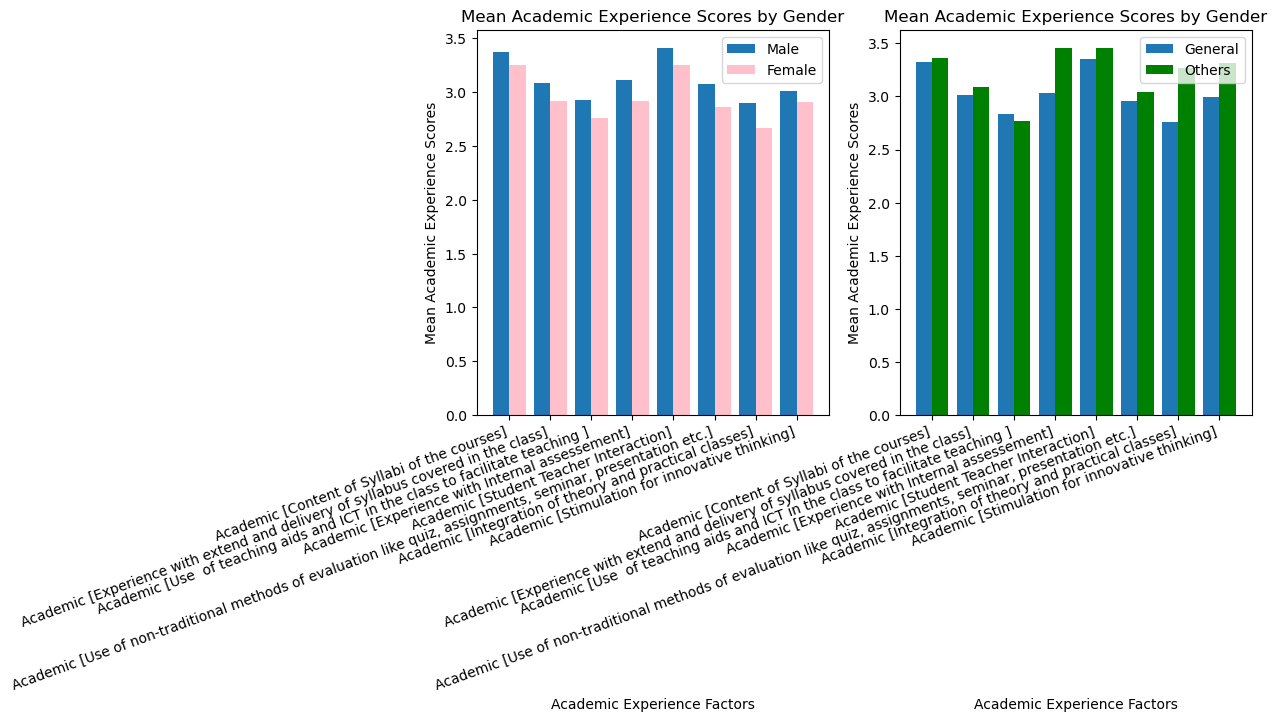

In [26]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)

academic_experience_columns = faculty_factor_columns[2:]

male_data = data[df['Gender'] == 'Male']
female_data = data[df['Gender'] == 'Female']

male_means = male_data[academic_experience_columns].mean()
female_means = female_data[academic_experience_columns].mean()

x = range(len(academic_experience_columns))

plt.bar(x, male_means, width=0.4, label='Male', align='center')
plt.bar([i + 0.4 for i in x], female_means, width=0.4, label='Female', align='center', color='pink')

plt.xlabel('Academic Experience Factors')
plt.ylabel('Mean Academic Experience Scores')
plt.title('Mean Academic Experience Scores by Gender')
plt.xticks([i + 0.2 for i in x], academic_experience_columns, rotation=20, ha='right')
plt.legend()

plt.subplot(1, 2, 2)
academic_experience_columns = faculty_factor_columns[2:]

gen_data = data[df['Category'] == 'General']
rest_data = data[df['Category'] == 'Other'] # changeable

gen_means = gen_data[academic_experience_columns].mean()
rest_means = rest_data[academic_experience_columns].mean()

x = range(len(academic_experience_columns))

plt.bar(x, gen_means, width=0.4, label='General', align='center')
plt.bar([i + 0.4 for i in x], rest_means, width=0.4, label='Others', align='center', color='green')

plt.xlabel('Academic Experience Factors')
plt.ylabel('Mean Academic Experience Scores')
plt.title('Mean Academic Experience Scores by Gender')
plt.xticks([i + 0.2 for i in x], academic_experience_columns, rotation=20, ha='right')
plt.legend()
plt.show()
# males have slightly better academic experience

#### Inclusivity and Diversity representation of different categories (e.g., gender, category) in various programs

In [26]:
grouped_gender = df1.groupby(['Programme of Study', 'Gender']).size().unstack(fill_value=0)
grouped_category = df1.groupby(['Programme of Study', 'Category']).size().unstack(fill_value=0)

grouped_category = grouped_category.dropna()
m1 = grouped_category.sum(axis = 1)
grouped_category_percentage = grouped_category.div(m1, axis=0)

grouped_gender = grouped_gender.dropna()
m1 = grouped_gender.sum(axis = 1)
grouped_gender_percentage = grouped_gender.div(m1, axis=0)


print(grouped_gender_percentage)
grouped_category_percentage

Gender                Female      Male    Others
Programme of Study                              
M.Phil              0.466667  0.533333  0.000000
Masters             0.557454  0.441956  0.000589
Ph.D                0.566265  0.429719  0.004016
UG                  0.490347  0.509653  0.000000


Category                 EWS   General       OBC     Other       PwD  \
Programme of Study                                                     
M.Phil              0.066667  0.483333  0.183333  0.000000  0.033333   
Masters             0.087802  0.454331  0.260460  0.010018  0.020035   
Ph.D                0.072289  0.481928  0.244980  0.008032  0.016064   
UG                  0.100386  0.513514  0.239382  0.011583  0.015444   

Category                  SC        ST  
Programme of Study                      
M.Phil              0.183333  0.050000  
Masters             0.112552  0.054803  
Ph.D                0.124498  0.052209  
UG                  0.104247  0.015444

<Figure size 1200x600 with 0 Axes>

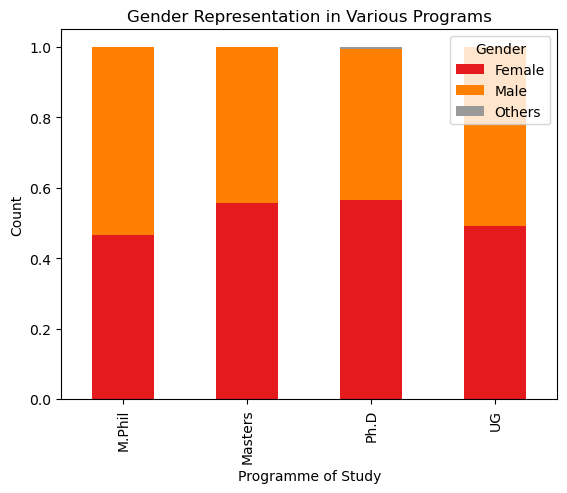

In [27]:
plt.figure(figsize=(12, 6))

grouped_gender_percentage.plot(kind='bar', stacked=True, colormap='Set1')
plt.xlabel('Programme of Study')
plt.ylabel('Count')
plt.title('Gender Representation in Various Programs')
plt.xticks()
plt.show()

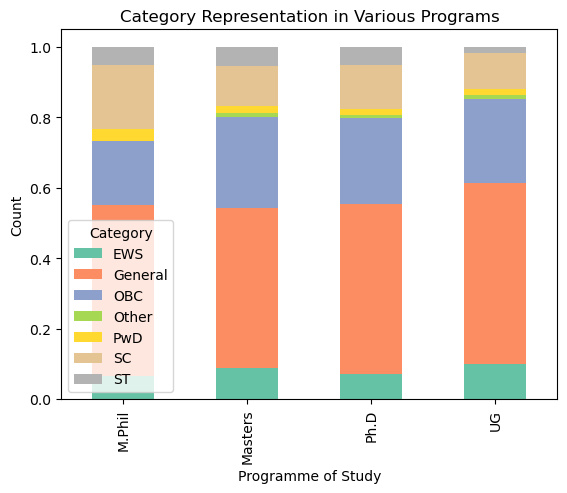

In [28]:
grouped_category_percentage.plot(kind='bar', stacked=True, colormap='Set2')
plt.xlabel('Programme of Study')
plt.ylabel('Count')
plt.title('Category Representation in Various Programs')
plt.xticks()
plt.show()

- masters and phd tend to have more Female students
- UG seems to have lowest distribution of ST students
- Most fraction of student is General then OBC

#### Understand relation between overall experience faculty and academic experience

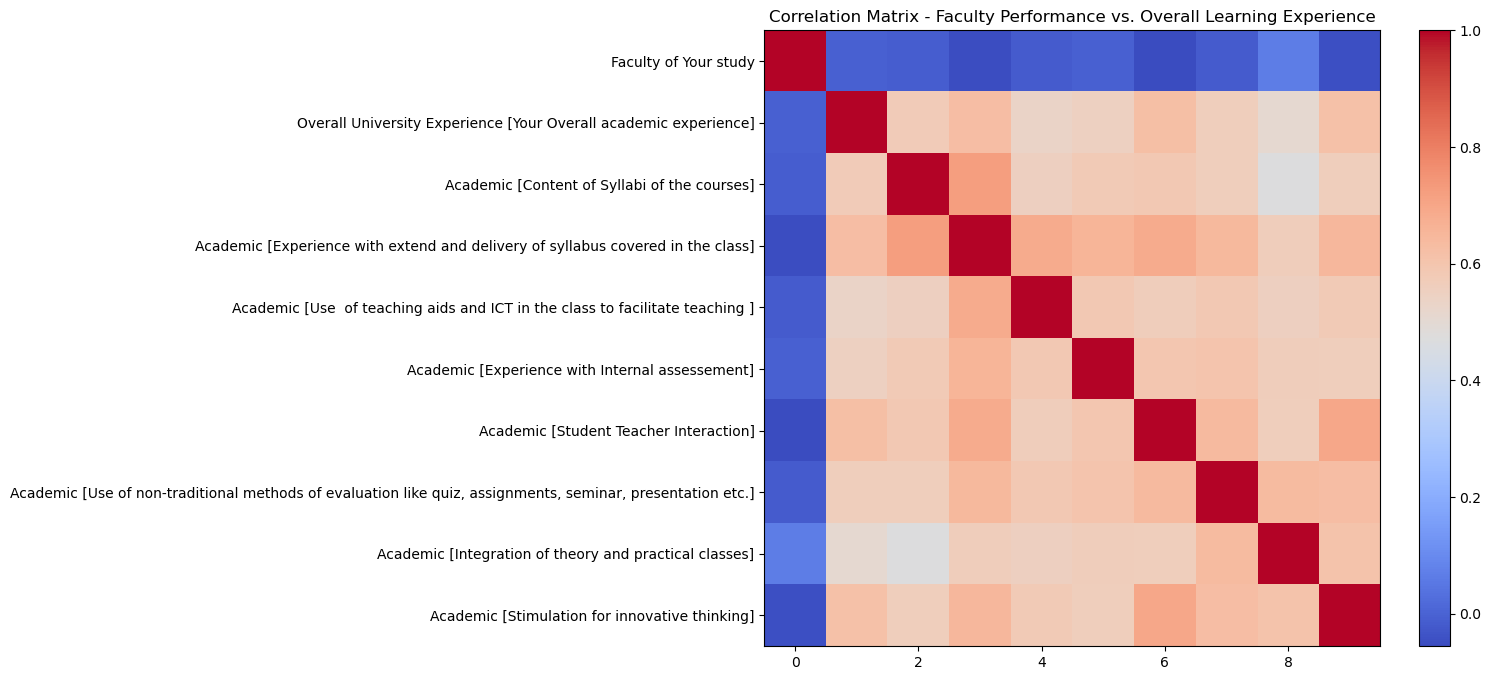

In [29]:
# Using correlation matrix
plt.figure(figsize=(10, 8))
plt.imshow(faculty_data.corr(), cmap='coolwarm', interpolation='nearest')
plt.title('Correlation Matrix - Faculty Performance vs. Overall Learning Experience')
plt.colorbar()
# plt.xticks(range(len(faculty_factor_columns)), faculty_data.columns)
plt.yticks(range(len(faculty_factor_columns)), faculty_data.columns)
plt.show()

Faculty has no effect on academic experience, if there is for some factorsit is most for integration in theory and practical

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = data[faculty_factor_columns[2:]]
y = data[faculty_factor_columns[1]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k_best = SelectKBest(k=5)
X_train_selected = k_best.fit_transform(X_train, y_train)
X_test_selected = k_best.transform(X_test)

model = LinearRegression()

model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.3f}')
print(f'R-squared: {r2:.3f}')

Mean Squared Error: 0.681
R-squared: 0.437


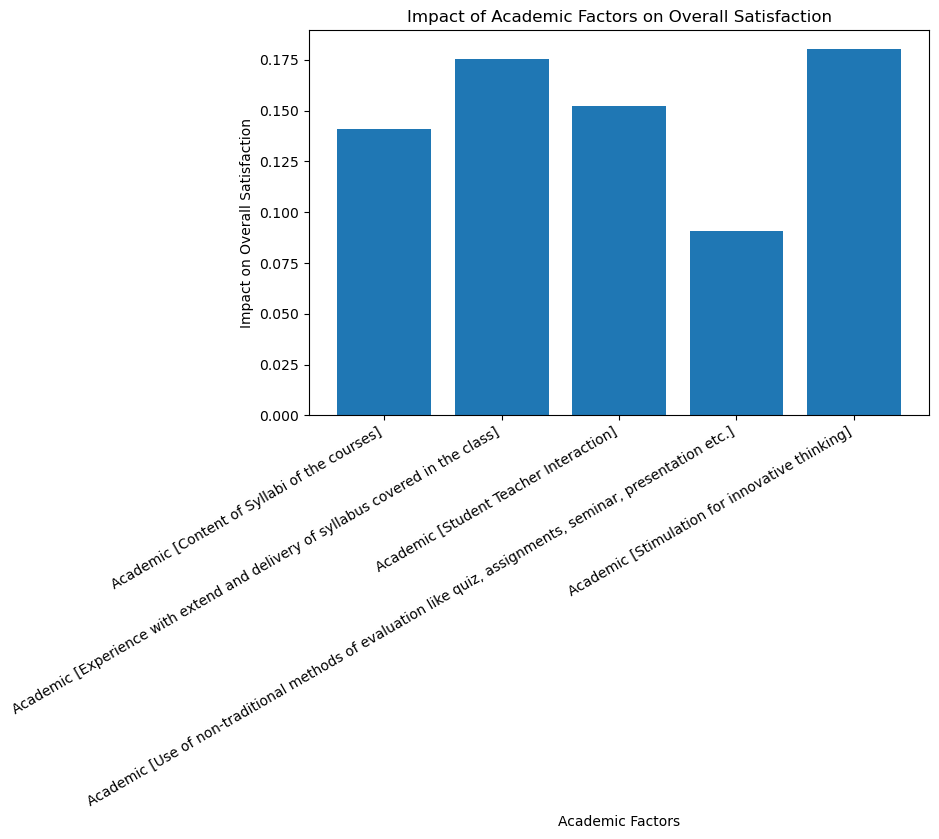

In [31]:
plt.figure(figsize=(8, 5))
selected_factor_names = [faculty_factor_columns[i+2] for i in k_best.get_support(indices=True)]
factor_scores = model.coef_

plt.bar(selected_factor_names, factor_scores)
plt.xlabel('Academic Factors')
plt.ylabel('Impact on Overall Satisfaction')
plt.title('Impact of Academic Factors on Overall Satisfaction')
plt.xticks(rotation=30, ha='right')
plt.show()

'Academic [Stimulation for innovative thinking]' and 'Academic [Experience with extend and delivery of syllabus covered in the class]', are the two factors that affect the overall experience most

#### Student Satisfaction / Experience regarding different infrastructural aspects


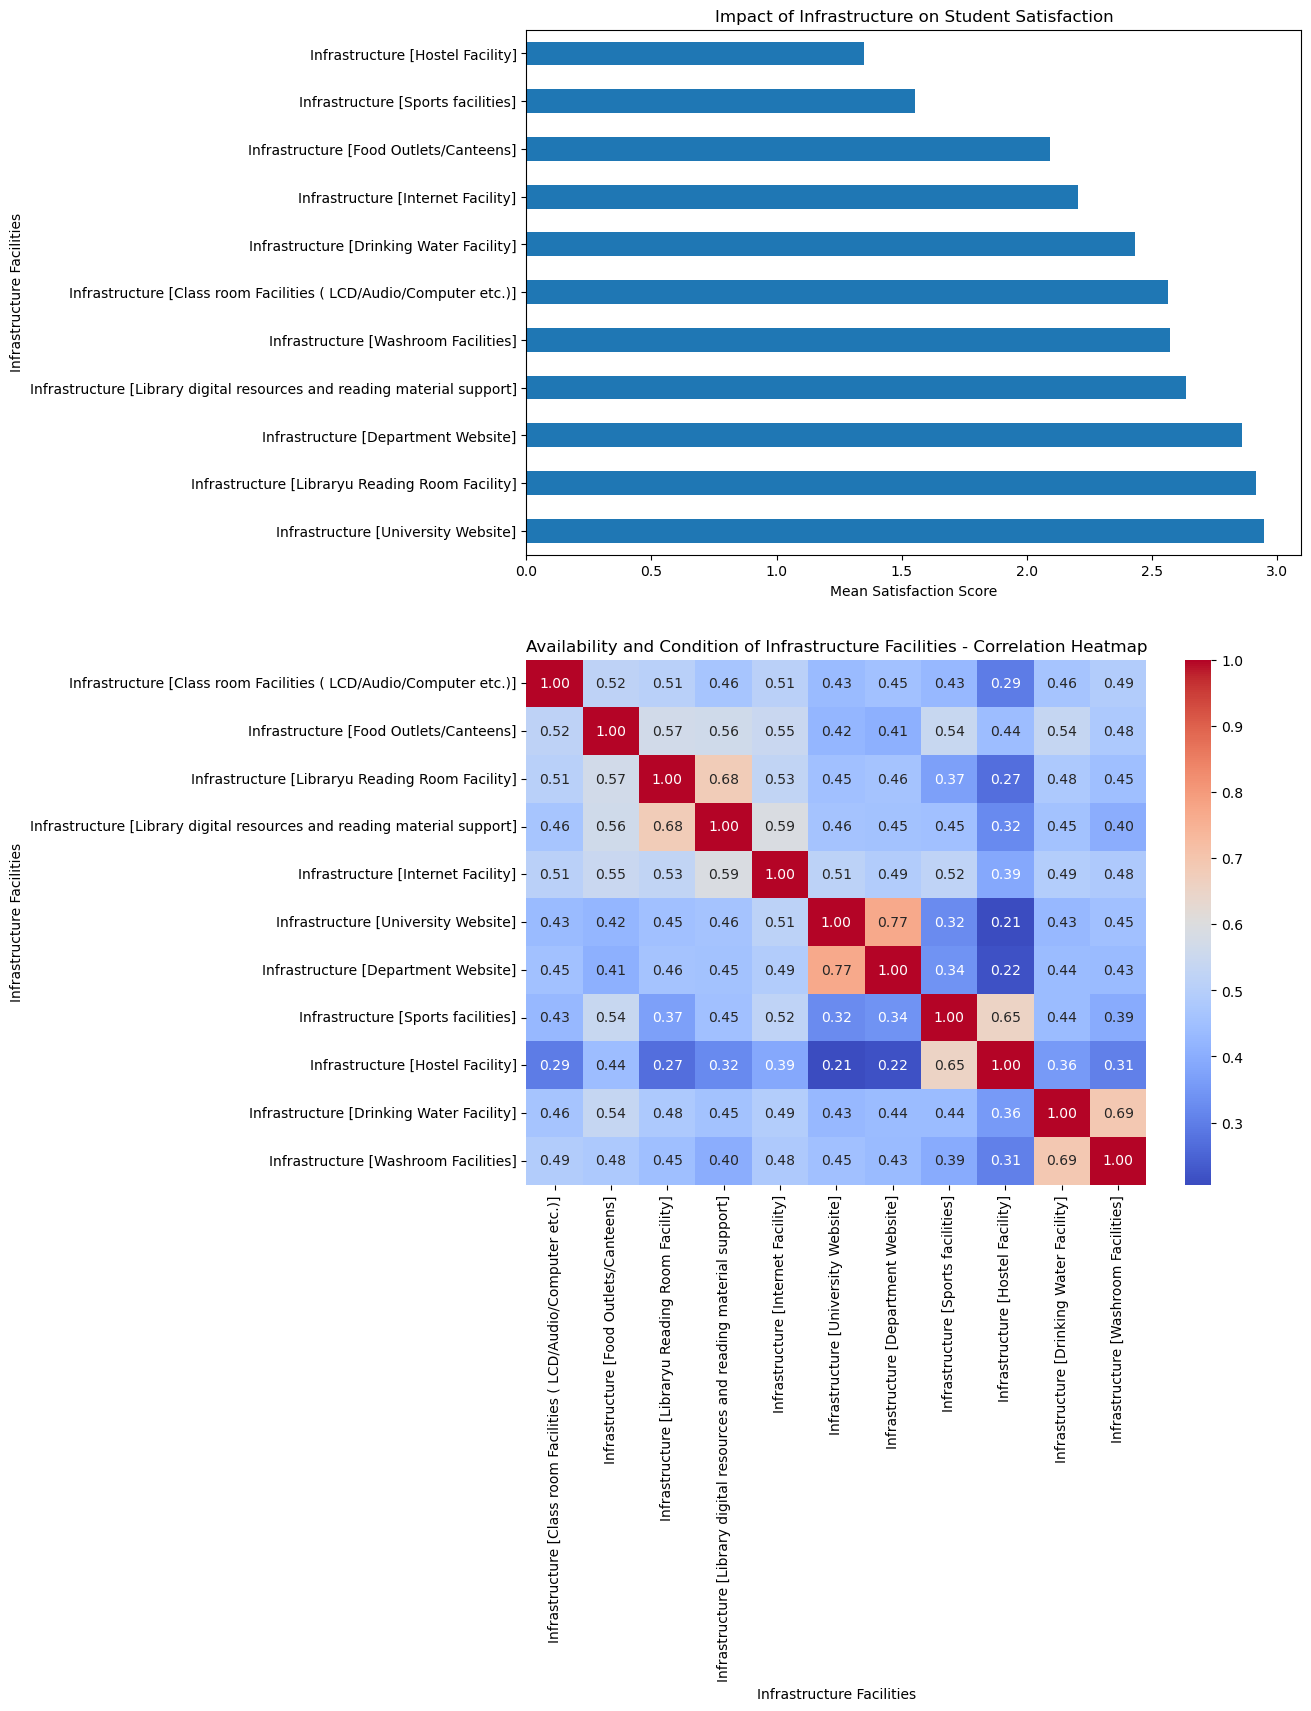

In [32]:
infrastructure_columns = [
    'Infrastructure [Class room Facilities ( LCD/Audio/Computer etc.)]',
    'Infrastructure [Food Outlets/Canteens]',
    'Infrastructure [Libraryu Reading Room Facility]',
    'Infrastructure [Library digital resources and reading material support]',
    'Infrastructure [Internet Facility]',
    'Infrastructure [University Website]',
    'Infrastructure [Department Website]',
    'Infrastructure [Sports facilities]',
    'Infrastructure [Hostel Facility]',
    'Infrastructure [Drinking Water Facility]',
    'Infrastructure [Washroom Facilities]',
]

satisfaction_column = 'Overall University Experience [Your Overall academic experience]'
infrastructure_means = data[infrastructure_columns].mean()
infrastructure_means_sorted = infrastructure_means.sort_values(ascending=False)

plt.figure(figsize=(10, 15))

plt.subplot(2, 1, 1)
infrastructure_means_sorted.plot(kind='barh')
plt.xlabel('Mean Satisfaction Score')
plt.ylabel('Infrastructure Facilities')
plt.title('Impact of Infrastructure on Student Satisfaction')

infrastructure_data = data[infrastructure_columns]
plt.subplot(2, 1, 2)
sb.heatmap(infrastructure_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Availability and Condition of Infrastructure Facilities - Correlation Heatmap')
plt.xlabel('Infrastructure Facilities')
plt.ylabel('Infrastructure Facilities')
plt.xticks(rotation=90)
plt.show()


correlation between
- library resources and reading room facilities
- washroom and drinking water facility
- dept and uni website

lowest rating for hostel facility and sports in the university

#### OverAll experience spread among students

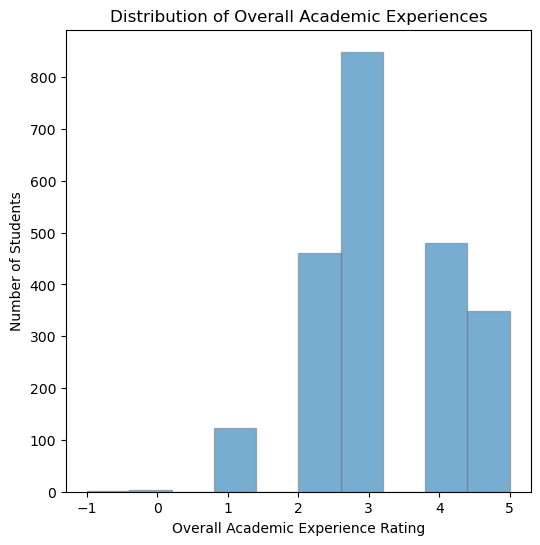

In [33]:
# To understand distribution of overall experience of students in the university

overall_experience = df_encoded['Overall University Experience [Your Overall academic experience]']
plt.figure(figsize=(6, 6))
plt.hist(overall_experience, bins=10, edgecolor='gray', alpha=0.6)
plt.xlabel('Overall Academic Experience Rating')
plt.ylabel('Number of Students')
plt.title('Distribution of Overall Academic Experiences')
plt.show()

 - most students lie between good and average

#### Understanding strengths and weaknesses of different Academic experiences of different Faculties

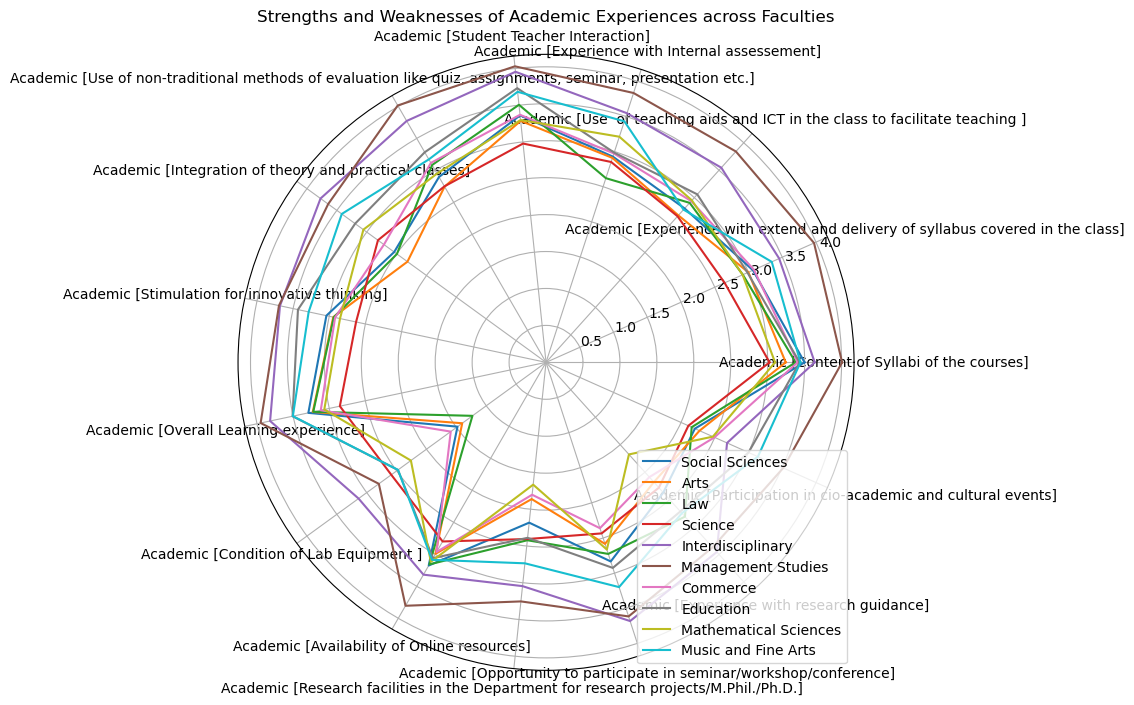

In [34]:
# Columns related to academic experiences
academic_columns = ['Academic [Content of Syllabi of the courses]',
                    'Academic [Experience with extend and delivery of syllabus covered in the class]',
                    'Academic [Use  of teaching aids and ICT in the class to facilitate teaching ]',
                    'Academic [Experience with Internal assessement]',
                    'Academic [Student Teacher Interaction]',
                    'Academic [Use of non-traditional methods of evaluation like quiz, assignments, seminar, presentation etc.]',
                    'Academic [Integration of theory and practical classes]',
                    'Academic [Stimulation for innovative thinking]',
                    'Academic [Overall Learning experience]',
                    'Academic [Condition of Lab Equipment ]',
                    'Academic [Availability of Online resources]',
                    'Academic [Research facilities in the Department for research projects/M.Phil./Ph.D.]',
                    'Academic [Opportunity to participate in seminar/workshop/conference]',
                    'Academic [Experience with research guidance]',
                    'Academic [Participation in cio-academic and cultural events]']

faculties = df['Faculty of Your study'].unique()
average_ratings = {}
for faculty in faculties:
    faculty_data = df[df['Faculty of Your study'] == faculty]
    average_ratings[faculty] = faculty_data[academic_columns].mean()

# radar chart
num_categories = len(academic_columns)
angles = np.linspace(0, 2 * np.pi, num_categories, endpoint=False)
angles = np.concatenate((angles, [angles[0]])) # to circle back

plt.figure(figsize=(10, 8))
for faculty in faculties:
    values = average_ratings[faculty].values
    values = np.concatenate((values, [values[0]]))
    plt.polar(angles, values, label=faculty)

plt.title('Strengths and Weaknesses of Academic Experiences across Faculties')
plt.xticks(angles[:-1], academic_columns, fontsize=10)
plt.legend(loc='lower right')
plt.show()

#### Spread of Residence among faculties

<Figure size 1000x600 with 0 Axes>

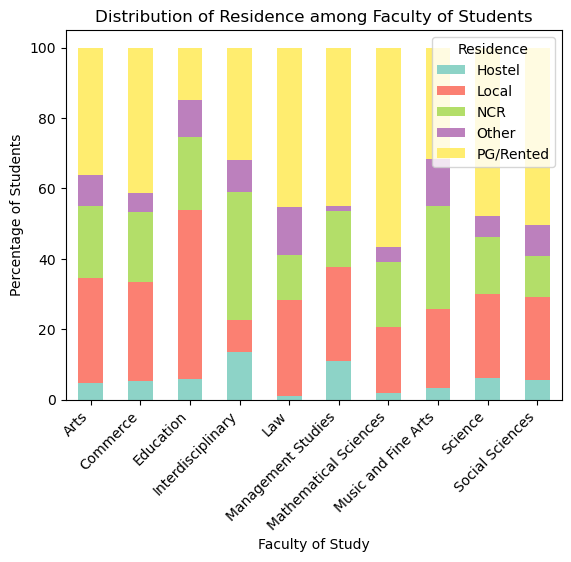

In [35]:
residence_distribution = df1.groupby(['Faculty of Your study', 'Residence']).size().reset_index(name='Count')
faculty_total = residence_distribution.groupby('Faculty of Your study')['Count'].transform('sum')

residence_distribution['Percentage'] = (residence_distribution['Count'] / faculty_total) * 100
residence_pivot = residence_distribution.pivot(index='Faculty of Your study', columns='Residence', values='Percentage')

plt.figure(figsize=(10, 6))
residence_pivot.plot(kind='bar', stacked=True, colormap='Set3')
plt.xlabel('Faculty of Study')
plt.ylabel('Percentage of Students')
plt.title('Distribution of Residence among Faculty of Students')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Residence', loc='upper right')
plt.show()

#### Wordcloud for Suggestion to see most frequent words

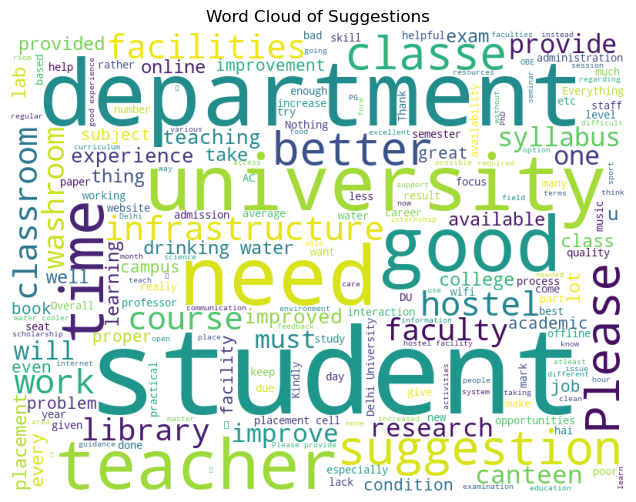

In [36]:
from wordcloud import WordCloud

suggestions_text = ' '.join(df['Suggestions, if any:'].dropna().astype(str))

wordcloud = WordCloud(width=800, height=600, background_color='white').generate(suggestions_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, )
plt.axis('off')
plt.title('Word Cloud of Suggestions')
plt.show()

# Rumaan

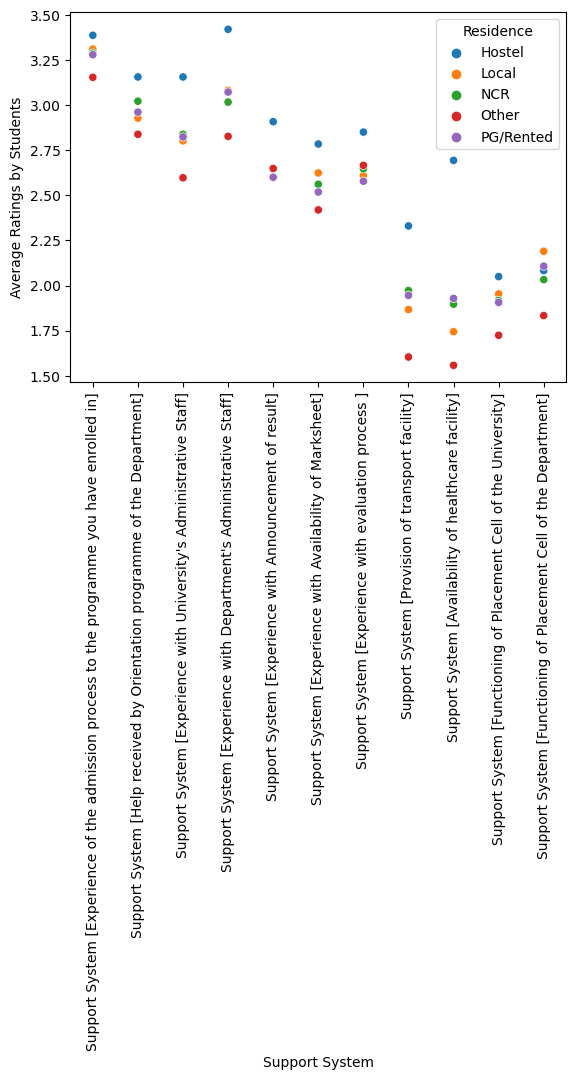

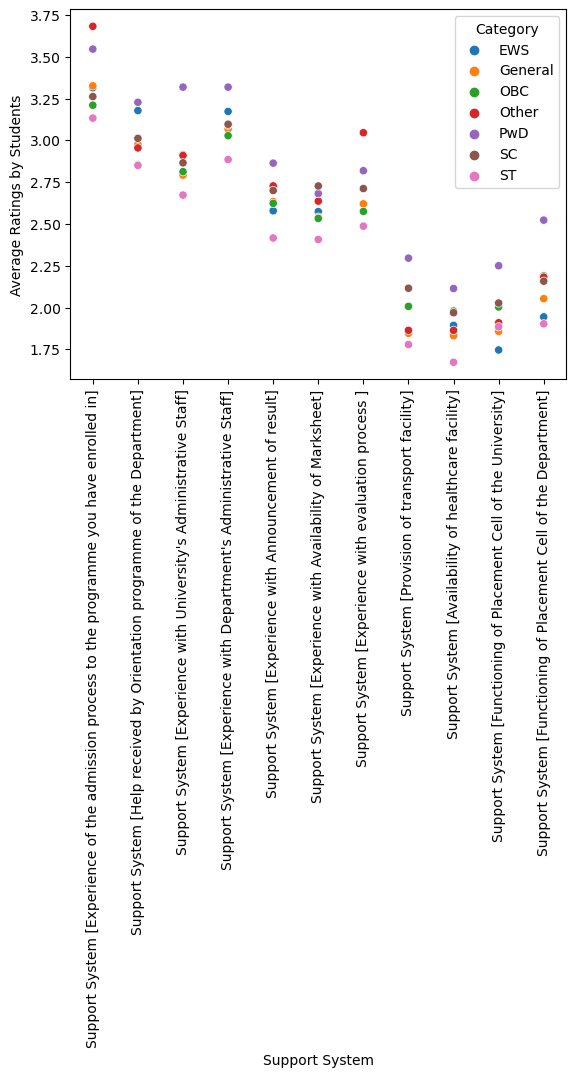

In [27]:
# Calculate mean for each Residence for each Support System
res_mean_values = df.groupby('Residence').mean().reset_index()[['Residence','Support System [Experience of the admission process to the programme you have enrolled in]',
       'Support System [Help received by Orientation programme of the Department]',
       'Support System [Experience with University\'s Administrative Staff]',
       'Support System [Experience with Department\'s Administrative Staff]',
       'Support System [Experience with Announcement of result]',
       'Support System [Experience with Availability of Marksheet]',
       'Support System [Experience with evaluation process ]',
       'Support System [Provision of transport facility]',
       'Support System [Availability of healthcare facility]',
       'Support System [Functioning of Placement Cell of the University]',
       'Support System [Functioning of Placement Cell of the Department]']]
# Melt the DataFrame into a long format
res_melted = pd.melt(res_mean_values, id_vars="Residence", var_name="Support System", value_name="Average Ratings by Students")

# Create a scatter plot
sb.scatterplot(data=res_melted, x="Support System", y="Average Ratings by Students", hue="Residence")
plt.xticks(rotation=90)
# Show the plot
plt.show()



# Calculate mean for each Category for each Support System
cat_mean_values = df.groupby('Category').mean().reset_index()[['Category','Support System [Experience of the admission process to the programme you have enrolled in]',
       'Support System [Help received by Orientation programme of the Department]',
       'Support System [Experience with University\'s Administrative Staff]',
       'Support System [Experience with Department\'s Administrative Staff]',
       'Support System [Experience with Announcement of result]',
       'Support System [Experience with Availability of Marksheet]',
       'Support System [Experience with evaluation process ]',
       'Support System [Provision of transport facility]',
       'Support System [Availability of healthcare facility]',
       'Support System [Functioning of Placement Cell of the University]',
       'Support System [Functioning of Placement Cell of the Department]']]
# Melt the DataFrame into a long format
cat_melted = pd.melt(cat_mean_values, id_vars="Category", var_name="Support System", value_name="Average Ratings by Students")

# Create a scatter plot
sb.scatterplot(data=cat_melted, x="Support System", y="Average Ratings by Students", hue="Category")
plt.xticks(rotation=90)

# Show the plot
plt.show()


In [28]:
ac_cols = ['Academic [Content of Syllabi of the courses]',
       'Academic [Experience with extend and delivery of syllabus covered in the class]',
       'Academic [Use  of teaching aids and ICT in the class to facilitate teaching ]',
       'Academic [Experience with Internal assessement]',
       'Academic [Student Teacher Interaction]',
       'Academic [Use of non-traditional methods of evaluation like quiz, assignments, seminar, presentation etc.]',
       'Academic [Integration of theory and practical classes]',
       'Academic [Stimulation for innovative thinking]',
       'Academic [Overall Learning experience]',
       'Academic [Condition of Lab Equipment ]',
       'Academic [Availability of Online resources]',
       'Academic [Research facilities in the Department for research projects/M.Phil./Ph.D.]',
       'Academic [Opportunity to participate in seminar/workshop/conference]',
       'Academic [Experience with research guidance]',
       'Academic [Participation in cio-academic and cultural events]']
sup_cols=['Support System [Experience of the admission process to the programme you have enrolled in]',
       'Support System [Help received by Orientation programme of the Department]',
       'Support System [Experience with University\'s Administrative Staff]',
       'Support System [Experience with Department\'s Administrative Staff]',
       'Support System [Experience with Announcement of result]',
       'Support System [Experience with Availability of Marksheet]',
       'Support System [Experience with evaluation process ]',
       'Support System [Provision of transport facility]',
       'Support System [Availability of healthcare facility]',
       'Support System [Functioning of Placement Cell of the University]',
       'Support System [Functioning of Placement Cell of the Department]']

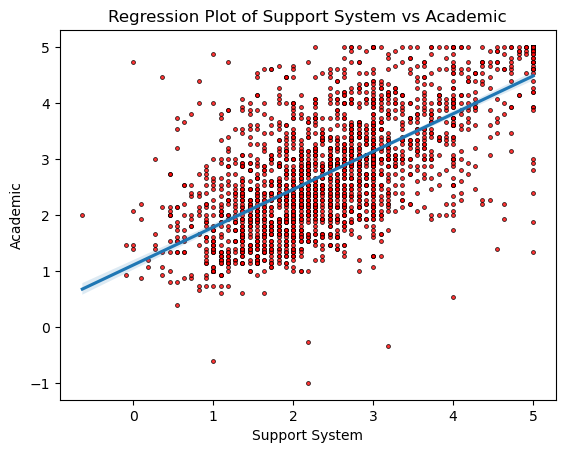

In [29]:
# Compute the row-wise mean of the Support System Columns
sup_row_means = df[sup_cols].mean(axis=1)

# Compute the row-wise mean of the Academic Columns
ac_row_means = df[ac_cols].mean(axis=1)

#DataFrame having two columns Support Sys and Academics means for each and every row
df_acsup = pd.concat([ac_row_means,sup_row_means], axis=1, keys=['Academic','Support System'])


# Create a scatter plot with a regression line
sb.regplot(x='Support System', y='Academic', data=df_acsup, scatter_kws={'color':'red', 'edgecolor':'black', 'linewidth':0.6, 's':8})

# Add title and labels
plt.title('Regression Plot of Support System vs Academic')
plt.xlabel('Support System')
plt.ylabel('Academic')

# Show the plot
plt.show()


<Figure size 8000x8000 with 0 Axes>

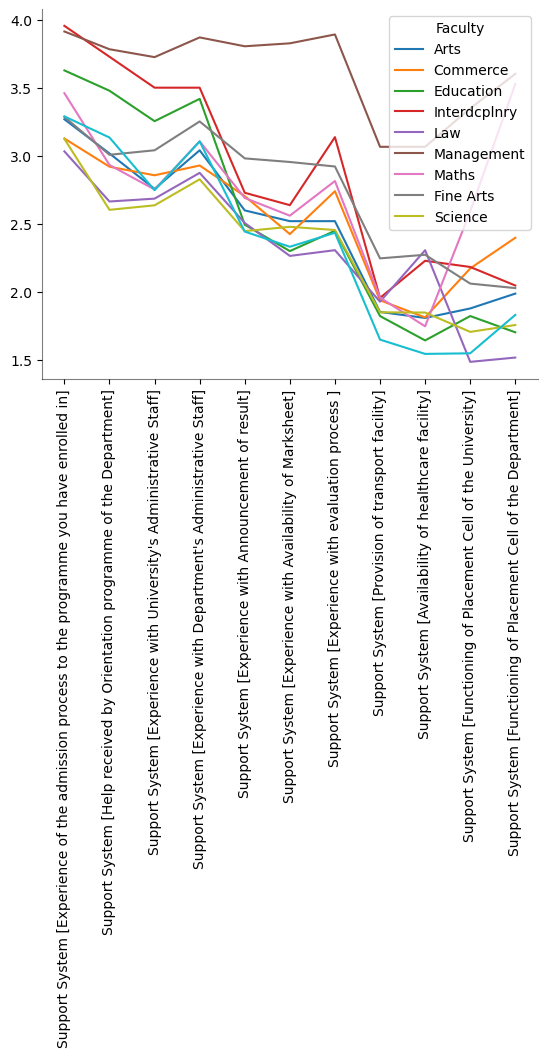

In [32]:
faculty_legend_mapping = { 
    10: 'Social Science',
    9 : 'Science',
    8 : 'Fine Arts',
    7 : 'Maths',
    6 : 'Management',
    5 : 'Law',
    4 : 'Interdcplnry',
    3 : 'Education',
    2 : 'Commerce',
    1 : 'Arts',
}
mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:brown', 'tab:grey', 'tab:pink', 'tab:olive', 'deeppink', 'steelblue', 'firebrick', 'mediumseagreen']      

df_sup_fac=df.groupby("Faculty of Your study").mean()[sup_cols]

plt.figure(figsize=(100, 100), dpi=80)
fig, ax = plt.subplots()
plt.xticks(rotation=45)
for i in range(0,10) :
    plt.plot(df_sup_fac.iloc[i])

plt.legend(title='Faculty', labels=[faculty_legend_mapping[rating] for rating in range(1, 10)])
plt.gca().spines["top"].set_alpha(0.0)
plt.gca().spines["bottom"].set_alpha(0.5)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.5)   
plt.xticks(rotation=90)

plt.show()




([<matplotlib.patches.Wedge at 0x20ea6a06460>,
 [Text(1.0531837527353096, 0.3174964298608259, ''),
  Text(0.6951538845882079, 0.8525028309289798, ''),
  Text(0.09002353145395463, 1.0963100673552892, ''),
  Text(-0.5831145169248203, 0.9327258226035847, ''),
  Text(-1.0141610524304545, 0.42600159592794157, ''),
  Text(-1.0489130231924673, -0.3313328685434617, ''),
  Text(-0.5389504345820053, -0.9589225354865052, ''),
  Text(0.14787937176974233, -1.0900145372447958, ''),
  Text(0.7370583525120946, -0.8165445395029943, ''),
  Text(1.0571559394533934, -0.30400874934516836, '')])

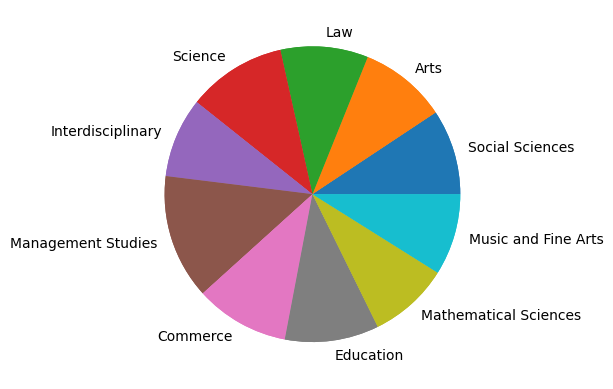

In [34]:
label=df["Faculty of Your study"].unique()
fig,ax=plt.subplots()
ax.pie(df_sup_fac.mean(axis=1), labels=label)
plt.pie(df_sup_fac.mean(axis=1))

## Arpit Mishra

In [37]:
data.columns

Index(['Programme of Study', 'Faculty of Your study',
       ' Name of the Department ', 'Semester of Study', 'Residence', 'Gender',
       'Category', 'Academic [Content of Syllabi of the courses]',
       'Academic [Experience with extend and delivery of syllabus covered in the class]',
       'Academic [Use  of teaching aids and ICT in the class to facilitate teaching ]',
       'Academic [Experience with Internal assessement]',
       'Academic [Student Teacher Interaction]',
       'Academic [Use of non-traditional methods of evaluation like quiz, assignments, seminar, presentation etc.]',
       'Academic [Integration of theory and practical classes]',
       'Academic [Stimulation for innovative thinking]',
       'Academic [Overall Learning experience]',
       'Academic [Condition of Lab Equipment ]',
       'Academic [Availability of Online resources]',
       'Academic [Research facilities in the Department for research projects/M.Phil./Ph.D.]',
       'Academic [Opportunity

In [38]:
df_arpit = df1.copy()

In [39]:
grouped_data = df_arpit.groupby('Faculty of Your study')

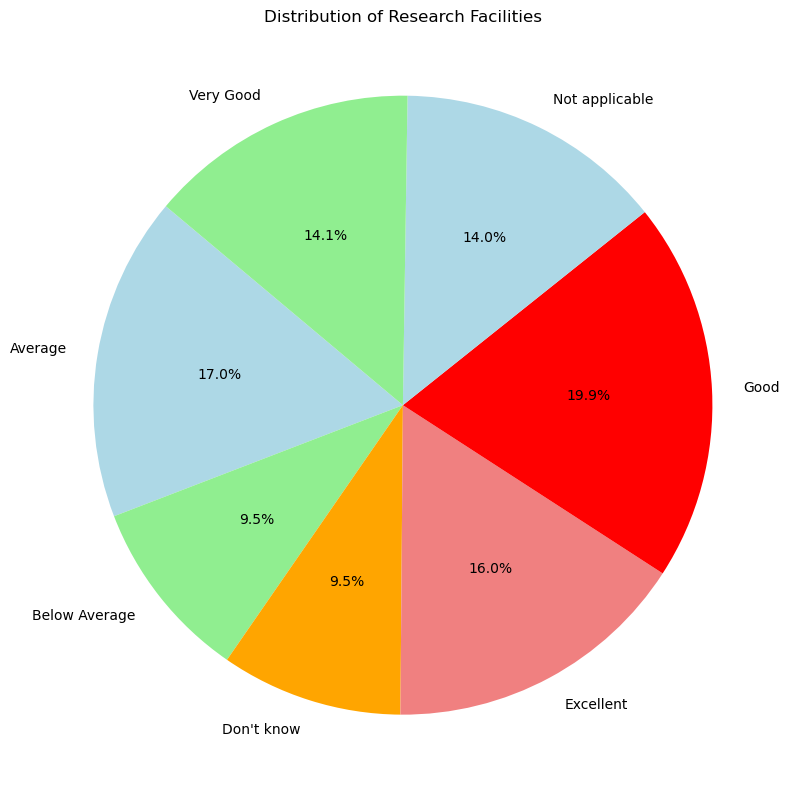

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'data' with the relevant data
# Group the data based on the 'Research_Facilities' column
grouped_data = df_arpit.groupby('Academic [Research facilities in the Department for research projects/M.Phil./Ph.D.]').size()

# Create the pie chart
plt.figure(figsize=(8, 8))
colors = ['lightblue', 'lightgreen', 'orange', 'lightcoral','red',]
plt.pie(grouped_data, labels=grouped_data.index, colors=colors, autopct='%1.1f%%', startangle=140)

# Additional plot settings
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Research Facilities')
plt.tight_layout()

plt.show()


In [41]:
# Rename the column to a simpler name
data.rename(columns={'Academic [Research facilities in the Department for research projects/M.Phil./Ph.D.]': 'Research_Facilities'}, inplace=True)

# Now you can use the new column name
review_counts1 = data['Research_Facilities'].value_counts()


In [42]:
import re

In [43]:
grouped_data = df_arpit.groupby(['Faculty of Your study', 'Gender']).size().unstack()

In [44]:
print(grouped_data)

Gender                 Female   Male  Others
Faculty of Your study                       
Arts                    262.0  168.0     NaN
Commerce                 60.0   51.0     NaN
Education                38.0   29.0     NaN
Interdisciplinary        13.0    9.0     NaN
Law                      44.0   51.0     NaN
Management Studies       27.0  111.0     NaN
Mathematical Sciences    72.0   89.0     NaN
Music and Fine Arts      74.0   75.0     2.0
Science                 375.0  258.0     NaN
Social Sciences         277.0  180.0     NaN


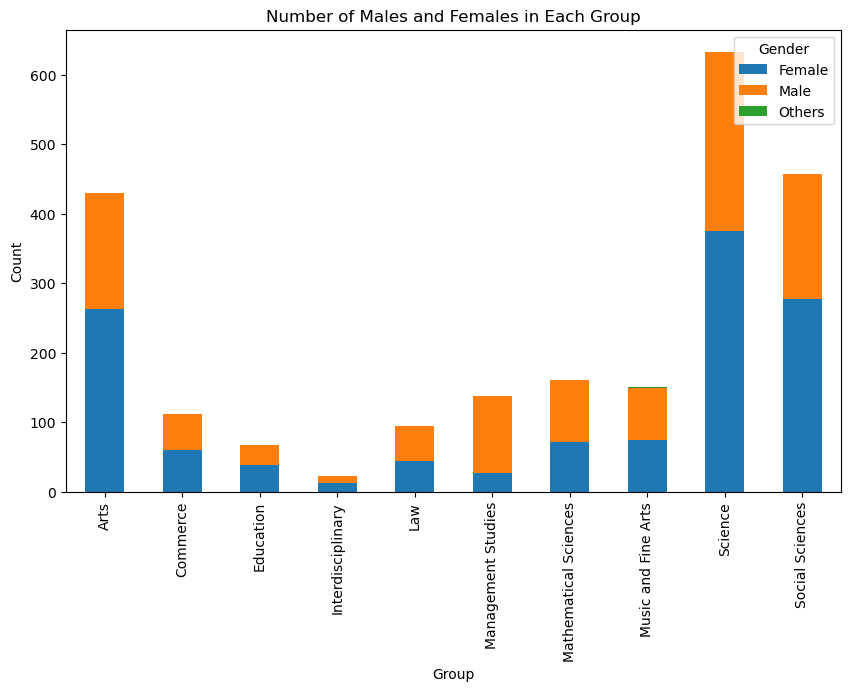

In [45]:
grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Group')
plt.ylabel('Count')
plt.title('Number of Males and Females in Each Group')
plt.legend(title='Gender', loc='upper right')
plt.show()

In [46]:
val = df_arpit['Residence'].unique()
for i in val:
    df_arpit['Residence'].replace(i, i.split(';')[0], inplace=True)
df_arpit['Residence'].value_counts()

PG/Rented    995
Local        578
NCR          397
Other        174
Hostel       121
Name: Residence, dtype: int64

In [47]:
unique_texts = df_arpit['Infrastructure [Sports facilities]'].unique()

In [48]:
print(unique_texts )

['Average' 'Below Average' 'Good' 'Not applicable' "Don't know"
 'Very Good' 'Excellent']


In [49]:
review_counts = df_arpit['Infrastructure [Sports facilities]'].value_counts()

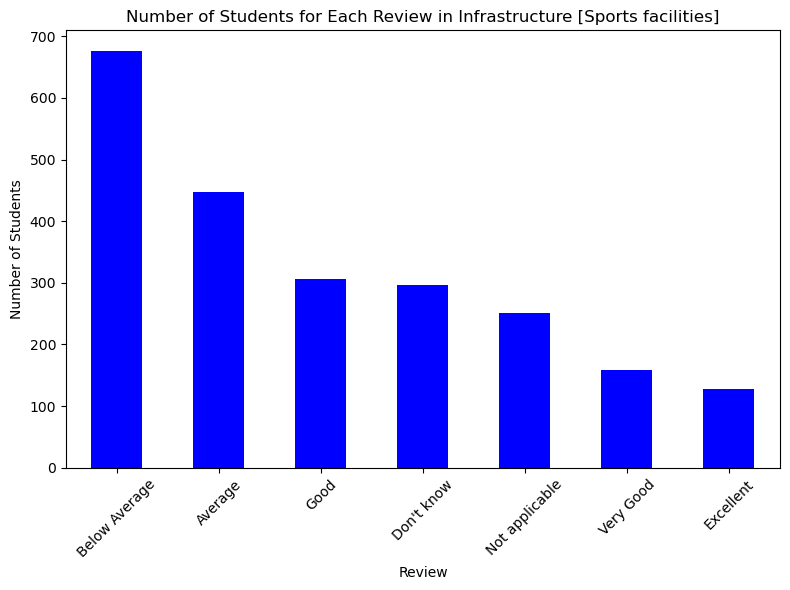

In [50]:
plt.figure(figsize=(8, 6))
review_counts.plot(kind='bar', color='blue')
plt.xlabel('Review')
plt.ylabel('Number of Students')
plt.title('Number of Students for Each Review in Infrastructure [Sports facilities]')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

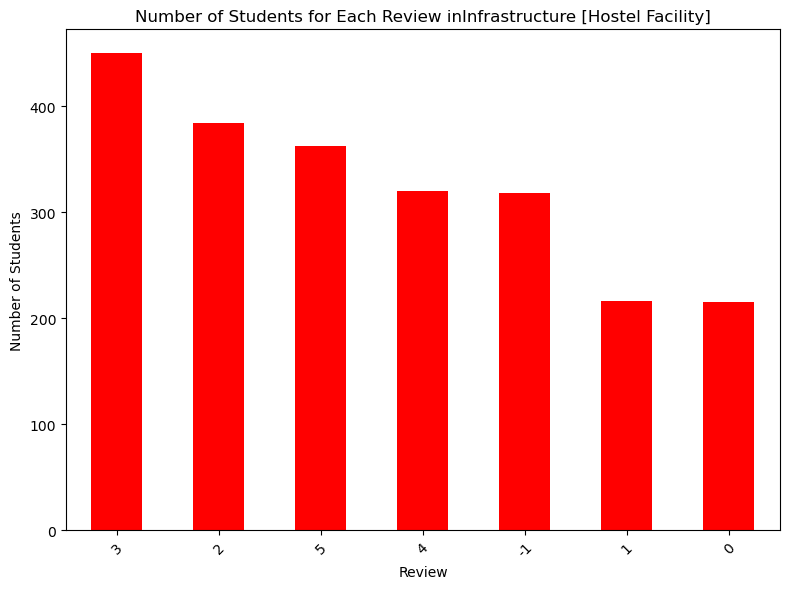

In [51]:

plt.figure(figsize=(8, 6))
review_counts1.plot(kind='bar', color='red')
plt.xlabel('Review')
plt.ylabel('Number of Students')
plt.title('Number of Students for Each Review inInfrastructure [Hostel Facility]')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [52]:
# Rename the column to a simpler name
df_arpit.rename(columns={'Academic [Research facilities in the Department for research projects/M.Phil./Ph.D.]': 'Facilities'}, inplace=True)

# Now you can use the new column name
review_counts1 = data['Research_Facilities'].value_counts()


## Rumaan Rehan

### Data Importing

C:\Users\areeb\AppData\Local\Temp\ipykernel_20316\1325274708.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cat_mean_values = df_rumaan.groupby('Category').mean().reset_index()[['Category','Support System [Experience of the admission process to the programme you have enrolled in]',


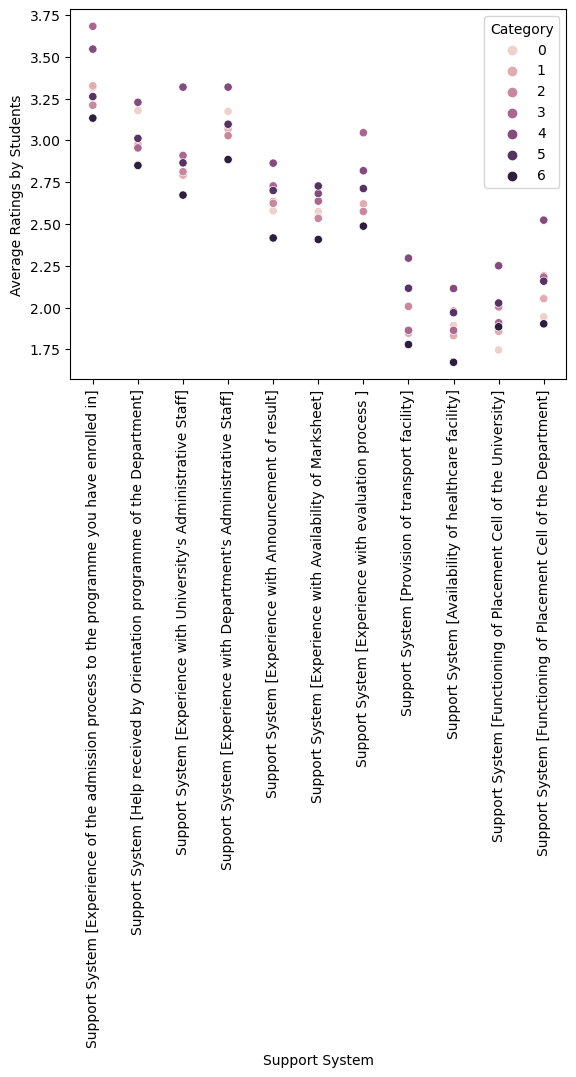

In [53]:
df_rumaan = df_encoded.copy()
cat_mean_values = df_rumaan.groupby('Category').mean().reset_index()[['Category','Support System [Experience of the admission process to the programme you have enrolled in]',
       'Support System [Help received by Orientation programme of the Department]',
       'Support System [Experience with University\'s Administrative Staff]',
       'Support System [Experience with Department\'s Administrative Staff]',
       'Support System [Experience with Announcement of result]',
       'Support System [Experience with Availability of Marksheet]',
       'Support System [Experience with evaluation process ]',
       'Support System [Provision of transport facility]',
       'Support System [Availability of healthcare facility]',
       'Support System [Functioning of Placement Cell of the University]',
       'Support System [Functioning of Placement Cell of the Department]']]
cat_melted = pd.melt(cat_mean_values, id_vars="Category", var_name="Support System", value_name="Average Ratings by Students")

sb.scatterplot(data=cat_melted, x="Support System", y="Average Ratings by Students", hue="Category")
plt.xticks(rotation=90)
plt.show()

C:\Users\areeb\AppData\Local\Temp\ipykernel_20316\782932162.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  res_mean_values = df_rumaan.groupby('Residence').mean().reset_index()[['Residence','Support System [Experience of the admission process to the programme you have enrolled in]',


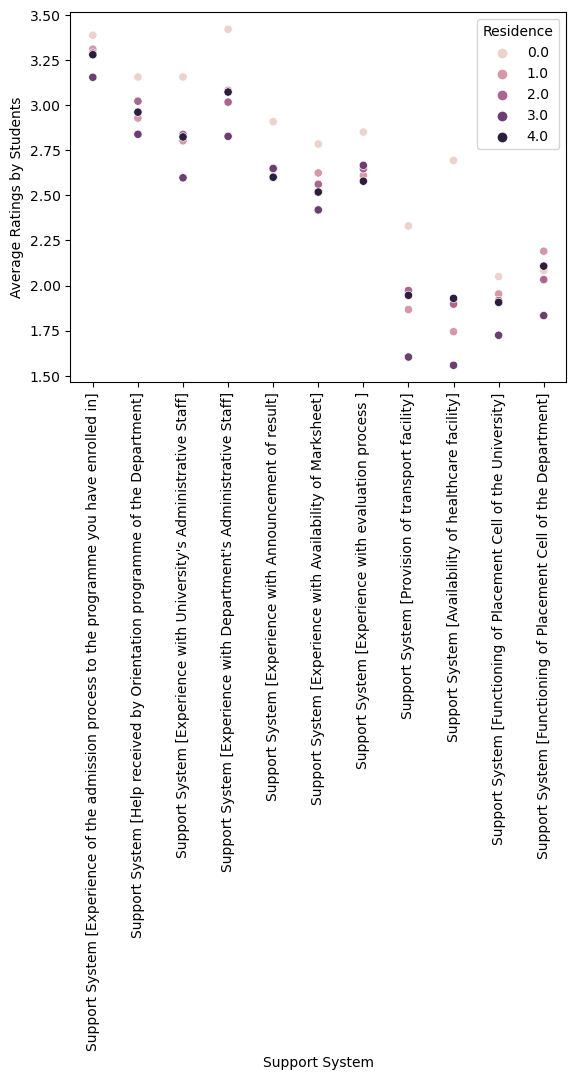

In [54]:
res_mean_values = df_rumaan.groupby('Residence').mean().reset_index()[['Residence','Support System [Experience of the admission process to the programme you have enrolled in]',
       'Support System [Help received by Orientation programme of the Department]',
       'Support System [Experience with University\'s Administrative Staff]',
       'Support System [Experience with Department\'s Administrative Staff]',
       'Support System [Experience with Announcement of result]',
       'Support System [Experience with Availability of Marksheet]',
       'Support System [Experience with evaluation process ]',
       'Support System [Provision of transport facility]',
       'Support System [Availability of healthcare facility]',
       'Support System [Functioning of Placement Cell of the University]',
       'Support System [Functioning of Placement Cell of the Department]']]
res_melted = pd.melt(res_mean_values, id_vars="Residence", var_name="Support System", value_name="Average Ratings by Students")

sb.scatterplot(data=res_melted, x="Support System", y="Average Ratings by Students", hue="Residence")
plt.xticks(rotation=90)
plt.show()


## AJAY

In [55]:
df_ajay=df1.copy()

programme_counts = df_ajay['Programme of Study'].value_counts()
programme_counts
print(programme_counts)

Masters    1697
UG          259
Ph.D        249
M.Phil       60
Name: Programme of Study, dtype: int64


In [56]:
programme_list= programme_counts.index.tolist()
print(type(programme_list))
programme_count_list= programme_counts.values.tolist()
print(programme_count_list)

print(type(programme_count_list))

crop=[0.1,0.0,0.0,0.0]

<class 'list'>
[1697, 259, 249, 60]
<class 'list'>


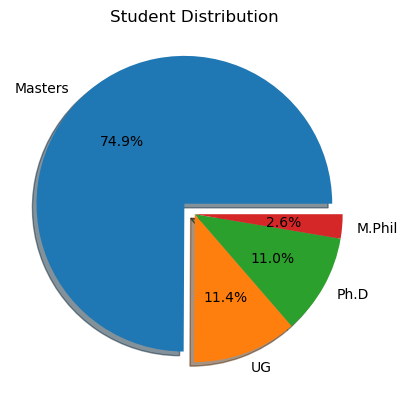

In [57]:
plt.pie(programme_count_list, labels=programme_list, explode=crop,autopct='%0.1f%%',shadow=True,labeldistance=1.1,textprops={"fontsize":10})
plt.title('Student Distribution')

# Display the chart
plt.show()

In [58]:
df_ajay = df.copy()
df_ajay = df_ajay.rename(columns={' Name of the Department ': 'Name_of_the_Department'})

In [59]:
df_ajay['Name_of_the_Department'].value_counts() # checking that the data is of department political scince'a only

chemistry                       289
Political Science               267
commerce                        163
music                           153
statistics                      142
economics                       100
law                              96
Germanic and Romance Studies     84
anthropology                     84
Philosophy                       81
Social Work                      81
Computer Science                 78
sociology                        71
education                        69
Commerce                         56
East Asian                       47
Electronic                       42
sanskrit                         41
botany                           32
DFBE                             32
biology                          31
psychology                       31
geography                        30
Zoology                          27
physics                          26
geology                          25
Biomedical                       22
Arabic                      

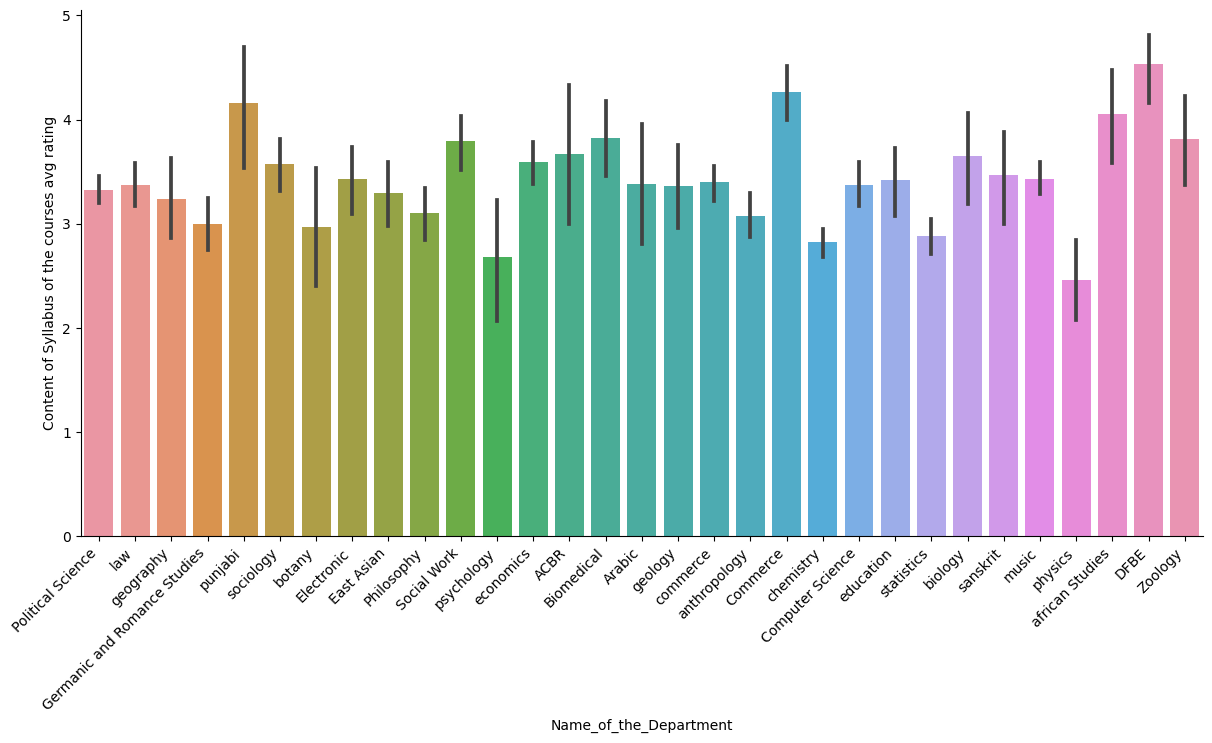

In [60]:

sb.catplot(x='Name_of_the_Department', y='Academic [Content of Syllabi of the courses]', data=df_ajay, kind='bar',height=6, aspect=2)
plt.xticks(rotation=45, ha='right')  # Rotating the x-axis labels for better readability
plt.ylabel('Content of Syllabus of the courses avg rating')

# Show the plot
plt.show()

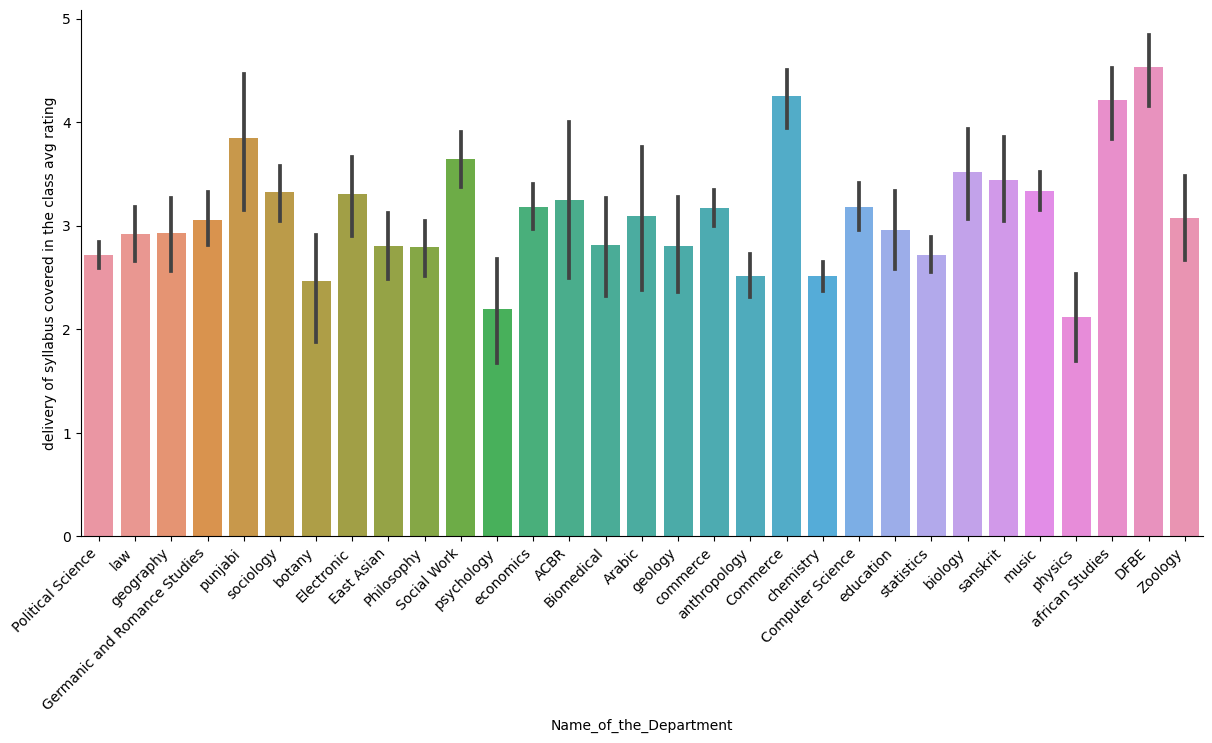

In [61]:
sb.catplot(x='Name_of_the_Department', y='Academic [Experience with extend and delivery of syllabus covered in the class]', data=df_ajay, kind='bar',height=6, aspect=2)
plt.xticks(rotation=45, ha='right')  # Rotating the x-axis labels for better readability

plt.ylabel('delivery of syllabus covered in the class avg rating')
# Show the plot
plt.show()

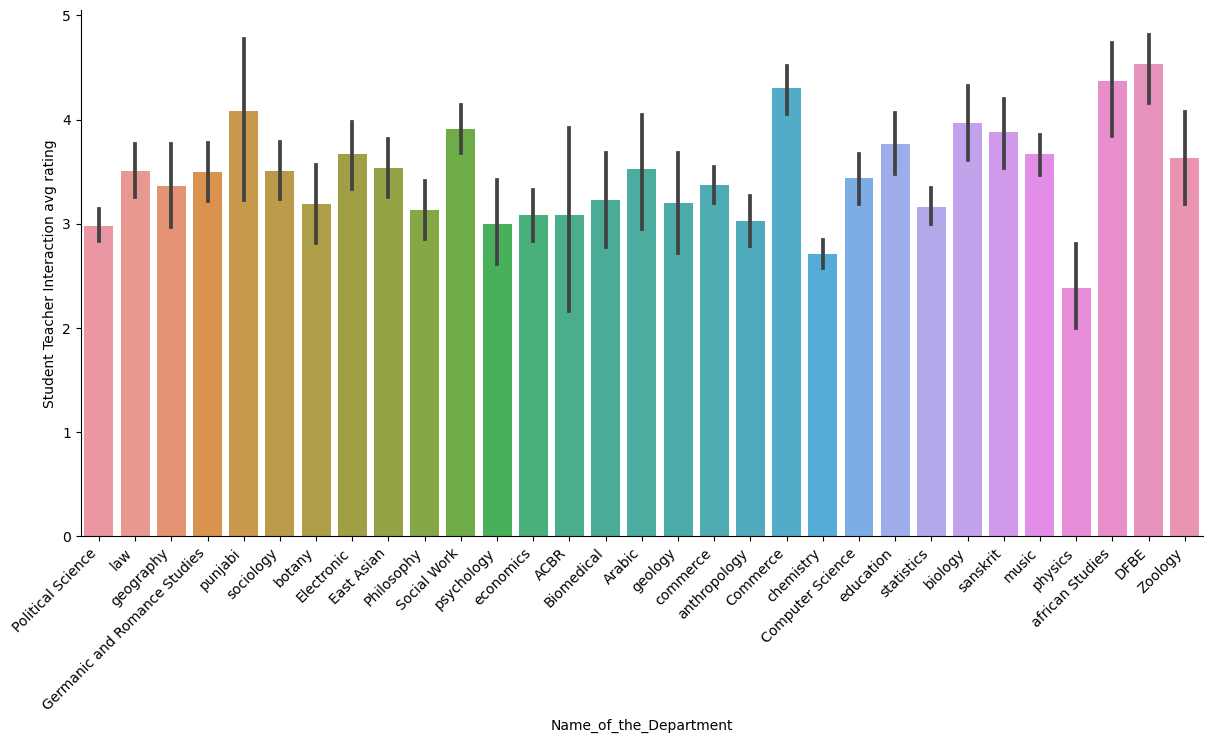

In [62]:
sb.catplot(x='Name_of_the_Department', y='Academic [Student Teacher Interaction]', data=df_ajay, kind='bar',height=6, aspect=2)
plt.xticks(rotation=45, ha='right')  # Rotating the x-axis labels for better readability
plt.ylabel('Student Teacher Interaction avg rating')
# Show the plot
plt.show()

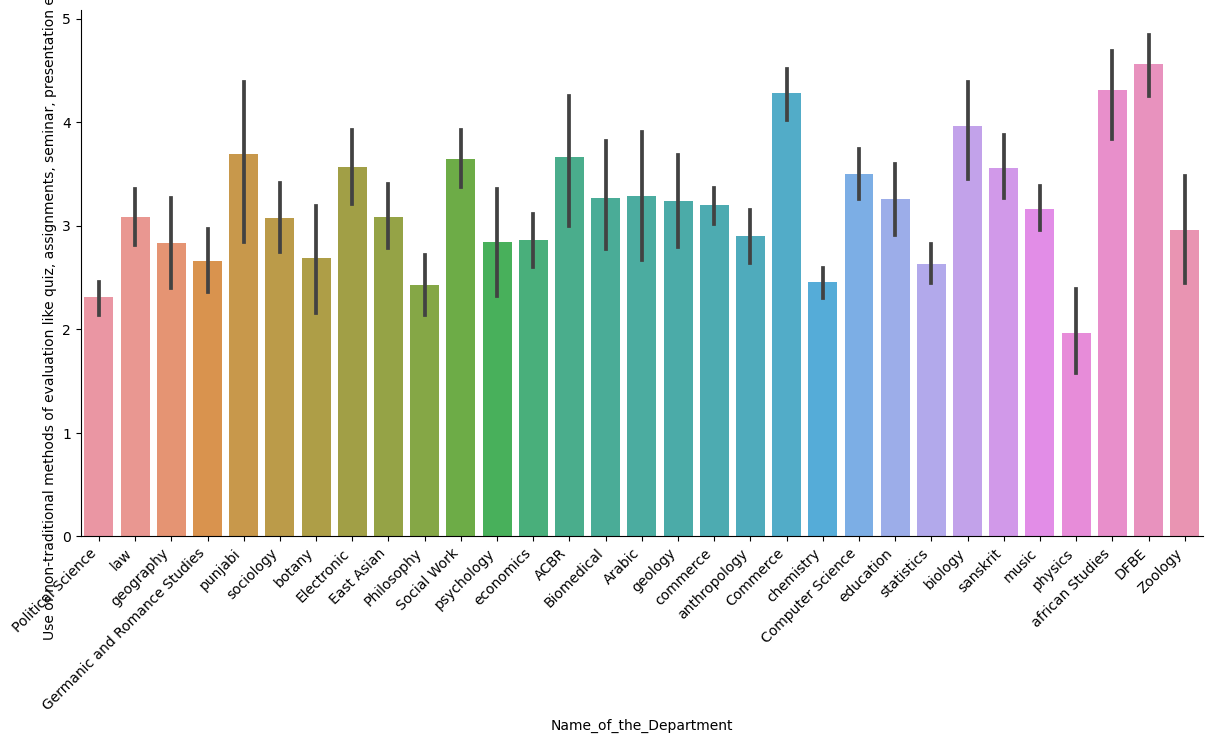

In [63]:
sb.catplot(x='Name_of_the_Department', y='Academic [Use of non-traditional methods of evaluation like quiz, assignments, seminar, presentation etc.]', data=df_ajay, kind='bar',height=6, aspect=2)
plt.xticks(rotation=45, ha='right')  # Rotating the x-axis labels for better readability

plt.ylabel('Use of non-traditional methods of evaluation like quiz, assignments, seminar, presentation etc avg rating')


# Show the plot
plt.show()

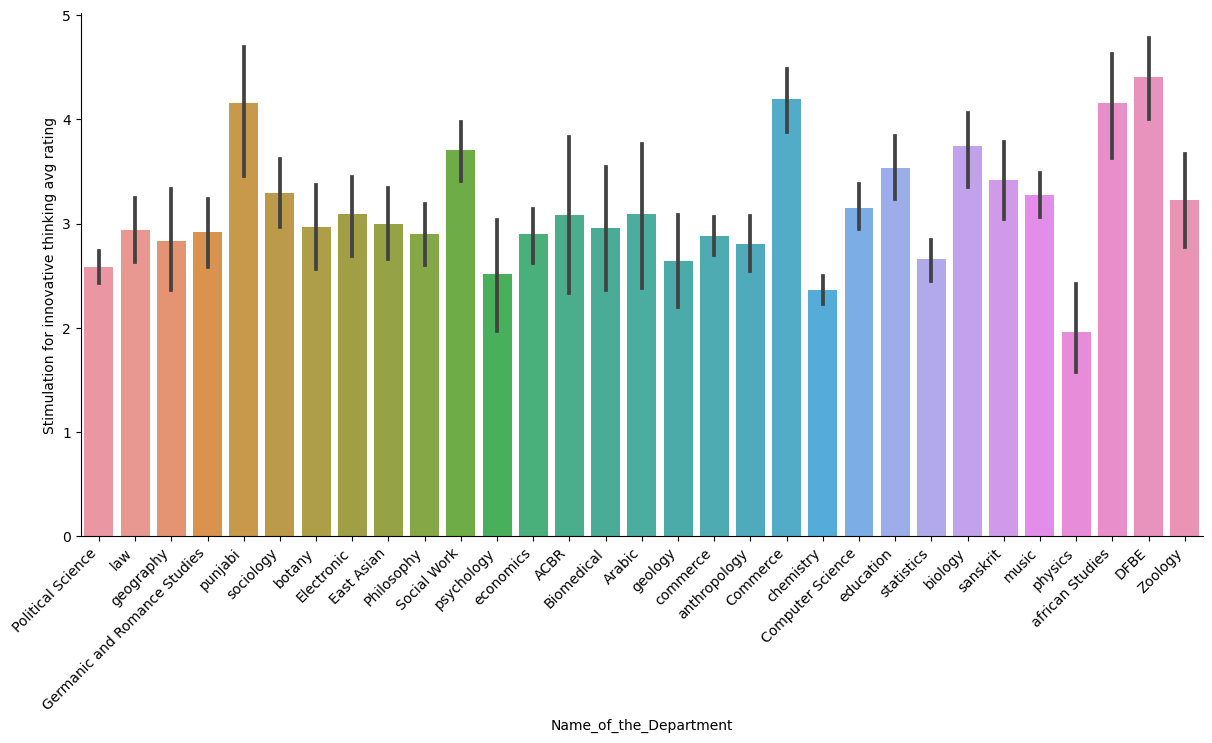

In [64]:
sb.catplot(x='Name_of_the_Department', y='Academic [Stimulation for innovative thinking]', data=df_ajay, kind='bar',height=6, aspect=2)
plt.xticks(rotation=45, ha='right')  # Rotating the x-axis labels for better readability

plt.ylabel('Stimulation for innovative thinking avg rating')



# Show the plot
plt.show()

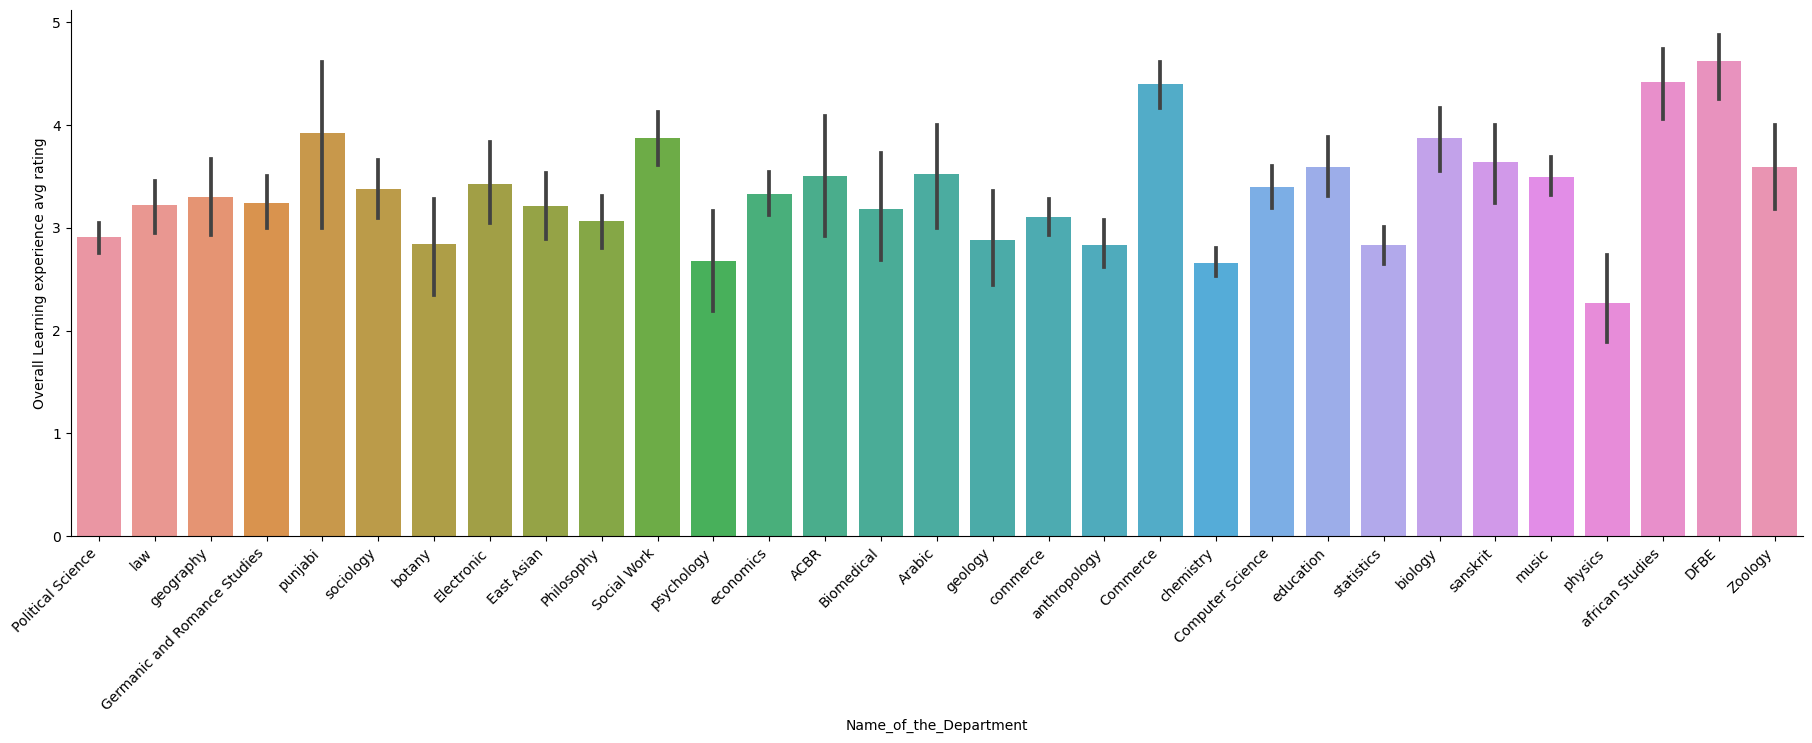

In [65]:
sb.catplot(x='Name_of_the_Department', y='Academic [Overall Learning experience]', data=df_ajay, kind='bar',height=6, aspect=3)
plt.xticks(rotation=45, ha='right')  # Rotating the x-axis labels for better readability

plt.ylabel('Overall Learning experience avg rating')

# Show the plot
plt.show()

In [66]:
phy_df = df_ajay[df_ajay['Name_of_the_Department'] == 'physics']

In [67]:
phy_df.to_csv('phy_df.csv', index=False)

In [68]:
phy_df['Programme of Study'].unique()

array([2], dtype=int64)

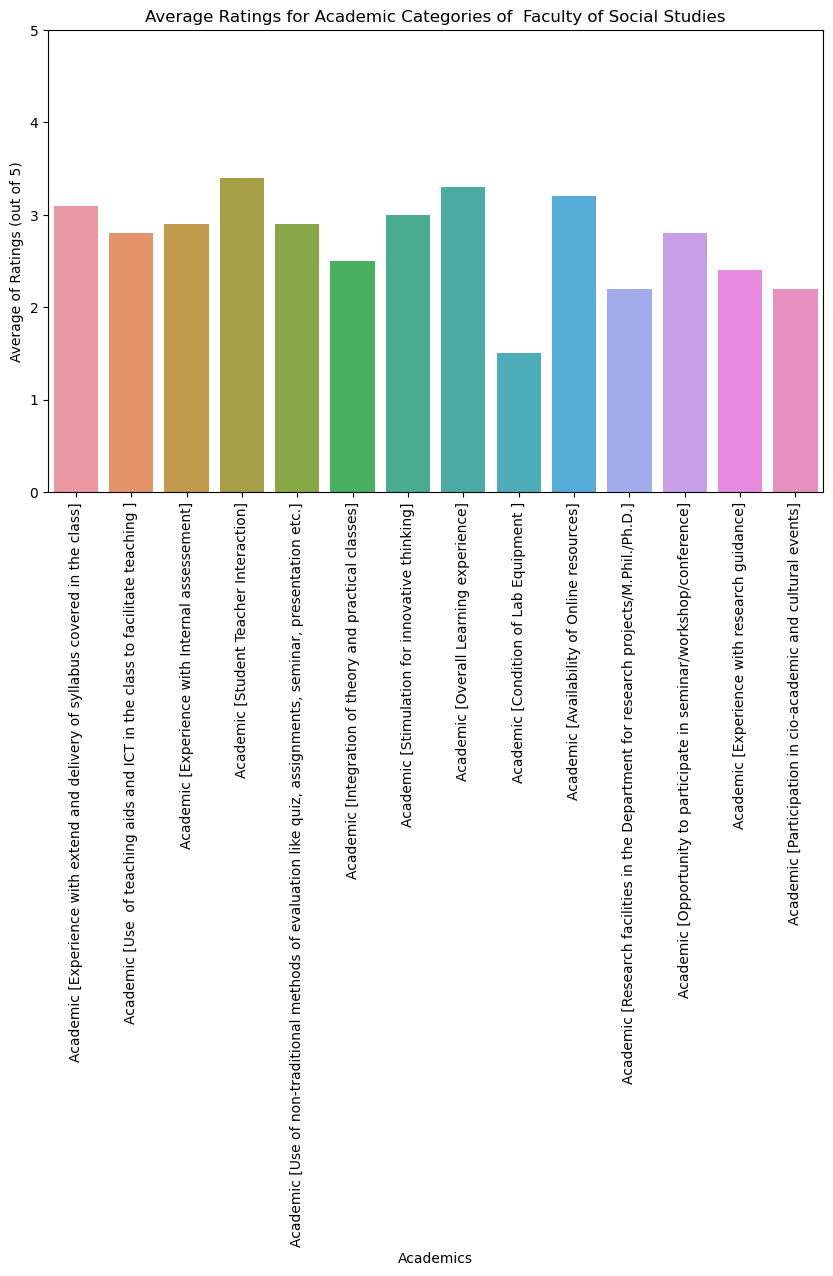

In [69]:
df_ajay.columns
list_of_acd = [
   'Academic [Experience with extend and delivery of syllabus covered in the class]',
       'Academic [Use  of teaching aids and ICT in the class to facilitate teaching ]',
       'Academic [Experience with Internal assessement]',
       'Academic [Student Teacher Interaction]',
       'Academic [Use of non-traditional methods of evaluation like quiz, assignments, seminar, presentation etc.]',
       'Academic [Integration of theory and practical classes]',
       'Academic [Stimulation for innovative thinking]',
       'Academic [Overall Learning experience]',
       'Academic [Condition of Lab Equipment ]',
       'Academic [Availability of Online resources]',
       'Academic [Research facilities in the Department for research projects/M.Phil./Ph.D.]',
       'Academic [Opportunity to participate in seminar/workshop/conference]',
       'Academic [Experience with research guidance]',
       'Academic [Participation in cio-academic and cultural events]'
]


df_ajay['Faculty of Your study'].unique()



social_science=df_ajay[df_ajay['Faculty of Your study']=='Social Sciences']
social_science['Faculty of Your study'].unique()

mean_list_social=[]
for i in list_of_acd:
  x=round(social_science[i].mean(),1)
  mean_list_social.append(x)
mean_list_social

plt.figure(figsize=(10, 6))
sb.barplot(x=list_of_acd, y=mean_list_social)

# Setting plot labels and title
plt.xlabel('Academics')
plt.ylabel('Average of Ratings (out of 5)')
plt.title('Average Ratings for Academic Categories of  Faculty of Social Studies')
plt.ylim(0, 5)
plt.xticks(rotation=90)
plt.show()

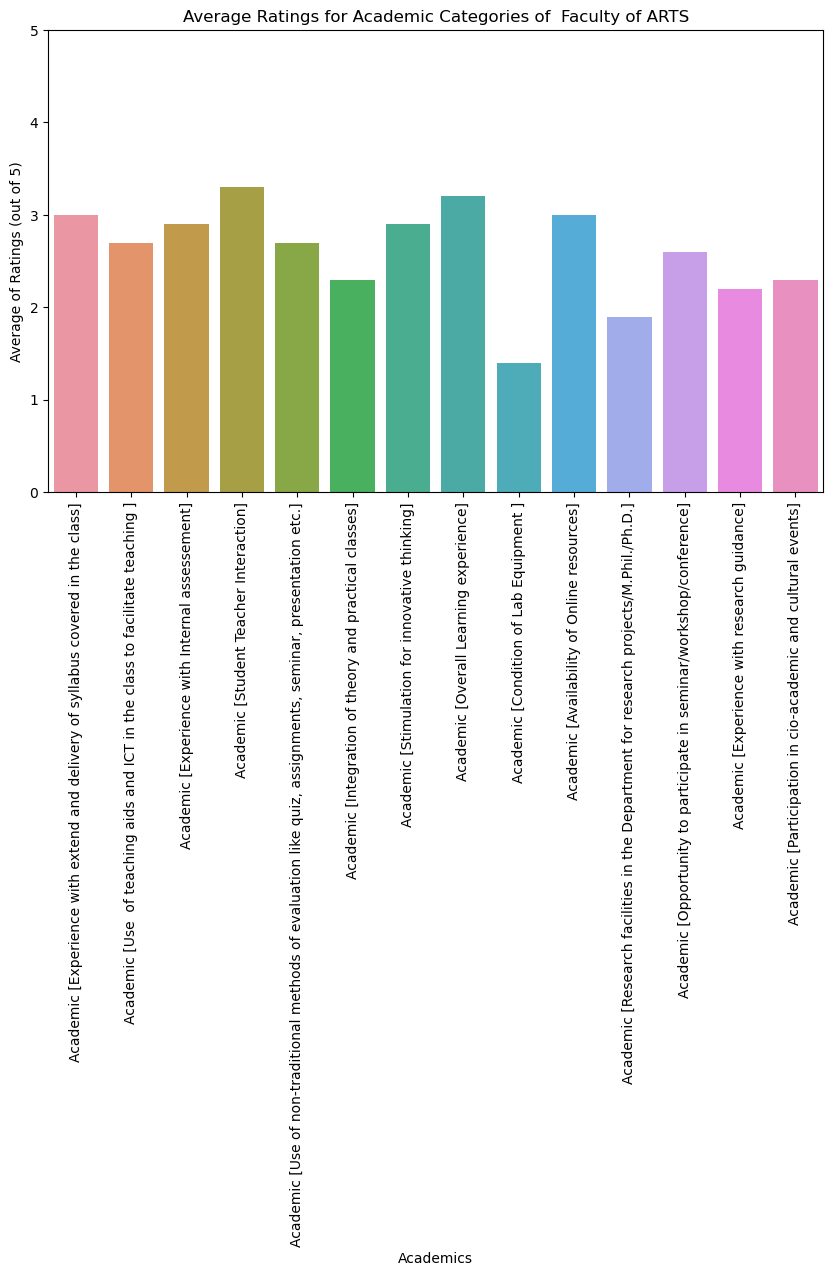

In [70]:
arts=df_ajay[df_ajay['Faculty of Your study']=='Arts']
arts['Faculty of Your study'].unique()

mean_list_arts=[]
for i in list_of_acd:
  x_arts=round(arts[i].mean(),1)
  mean_list_arts.append(x_arts)
mean_list_arts

plt.figure(figsize=(10, 6))
sb.barplot(x=list_of_acd, y=mean_list_arts)
plt.xlabel('Academics')
plt.ylabel('Average of Ratings (out of 5)')
plt.title('Average Ratings for Academic Categories of  Faculty of ARTS')
plt.ylim(0, 5)
plt.xticks(rotation=90)
plt.show()

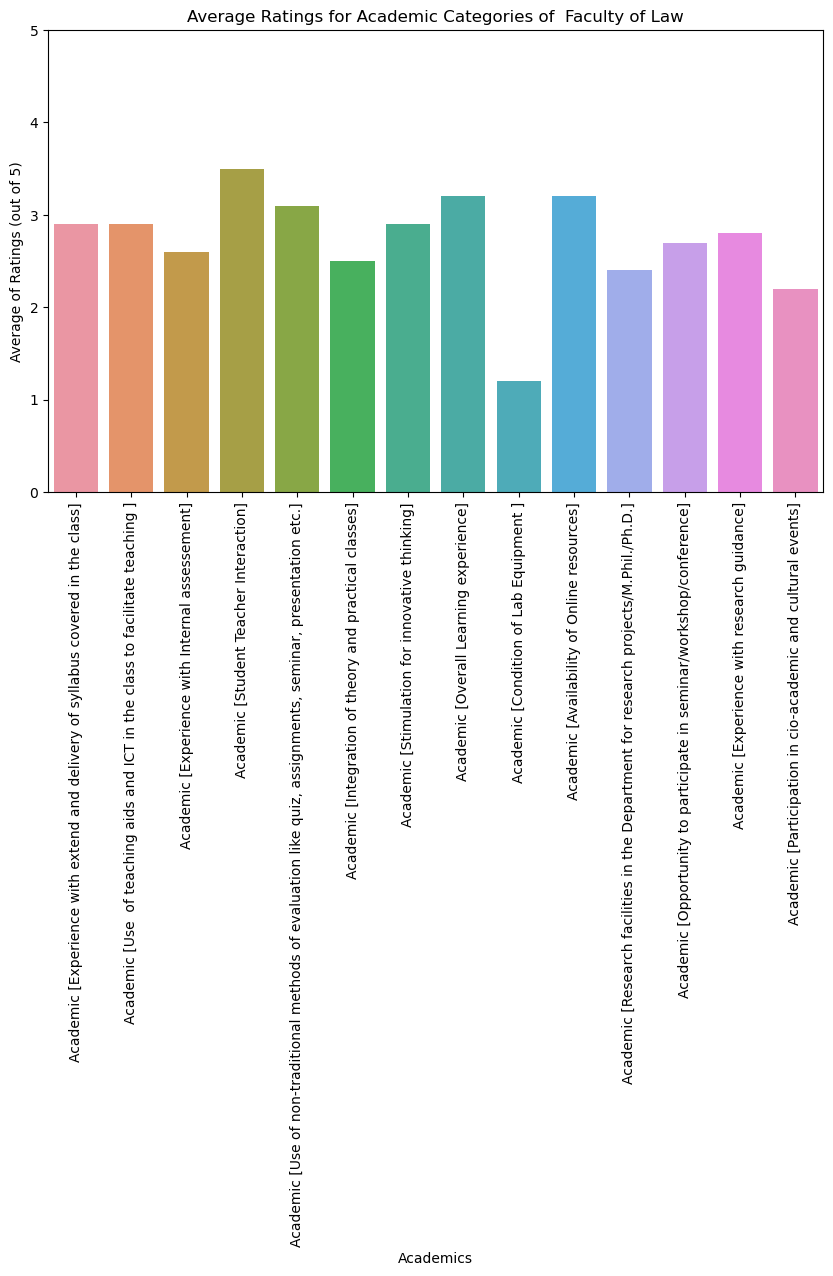

In [71]:
Law=df_ajay[df_ajay['Faculty of Your study']=='Law']
Law['Faculty of Your study'].unique()
mean_list_Law=[]
for i in list_of_acd:
  x_Law=round(Law[i].mean(),1)
  mean_list_Law.append(x_Law)
mean_list_Law

plt.figure(figsize=(10, 6))


sb.barplot(x=list_of_acd, y=mean_list_Law)

# Setting plot labels and title
plt.xlabel('Academics')
plt.ylabel('Average of Ratings (out of 5)')
plt.title('Average Ratings for Academic Categories of  Faculty of Law')



# Seting the yaxis range from 0 to 5
plt.ylim(0, 5)

# Rotating the y-axis labels to be vertical as it was overlapinfg in star
plt.xticks(rotation=90)


plt.show()

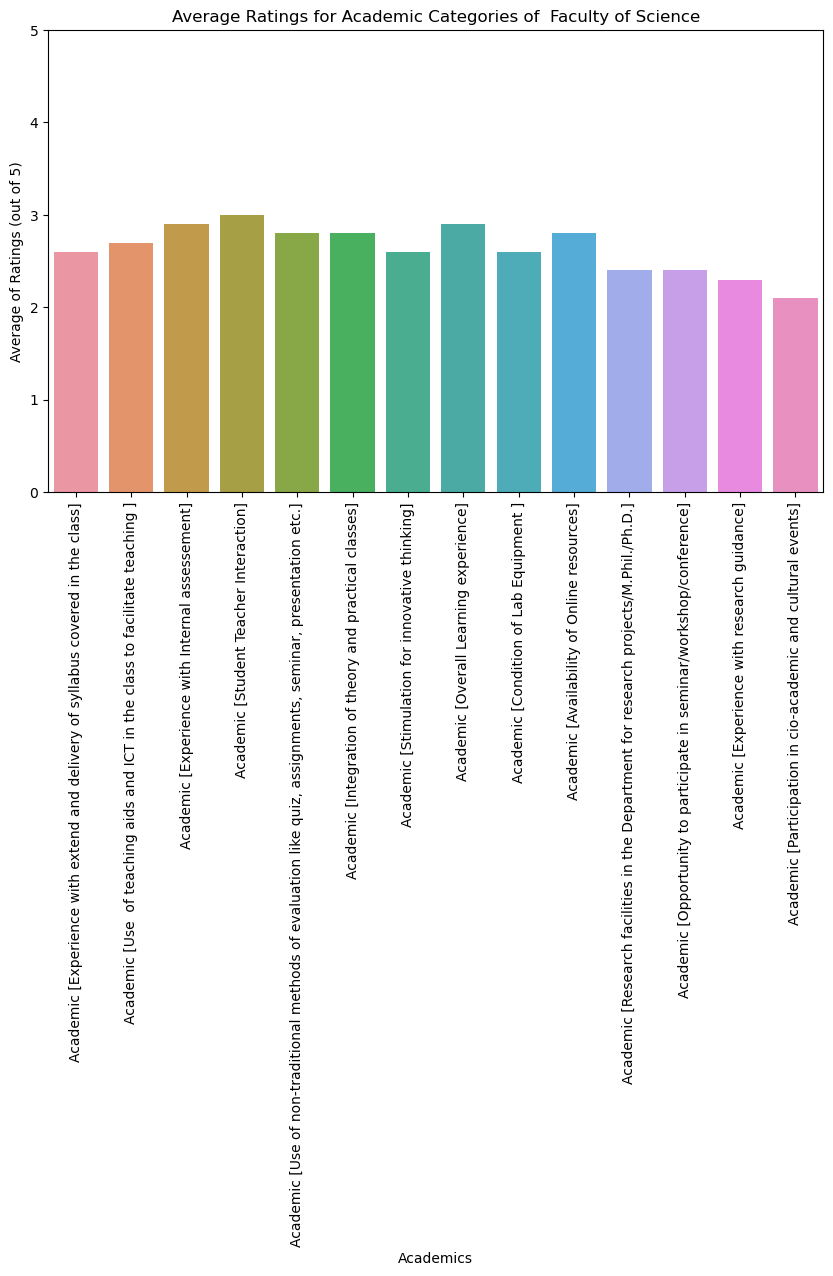

In [72]:
# filleting data for Science
Science=df_ajay[df_ajay['Faculty of Your study']=='Science']


# checking
Science['Faculty of Your study'].unique()

mean_list_Science=[]
for i in list_of_acd:
  x_Science=round(Science[i].mean(),1)
  mean_list_Science.append(x_Science)
mean_list_Science

plt.figure(figsize=(10, 6))


sb.barplot(x=list_of_acd, y=mean_list_Science)

# Setting plot labels and title
plt.xlabel('Academics')
plt.ylabel('Average of Ratings (out of 5)')
plt.title('Average Ratings for Academic Categories of  Faculty of Science')



# Seting the yaxis range from 0 to 5
plt.ylim(0, 5)

# Rotating the y-axis labels to be vertical as it was overlapinfg in star
plt.xticks(rotation=90)


plt.show()

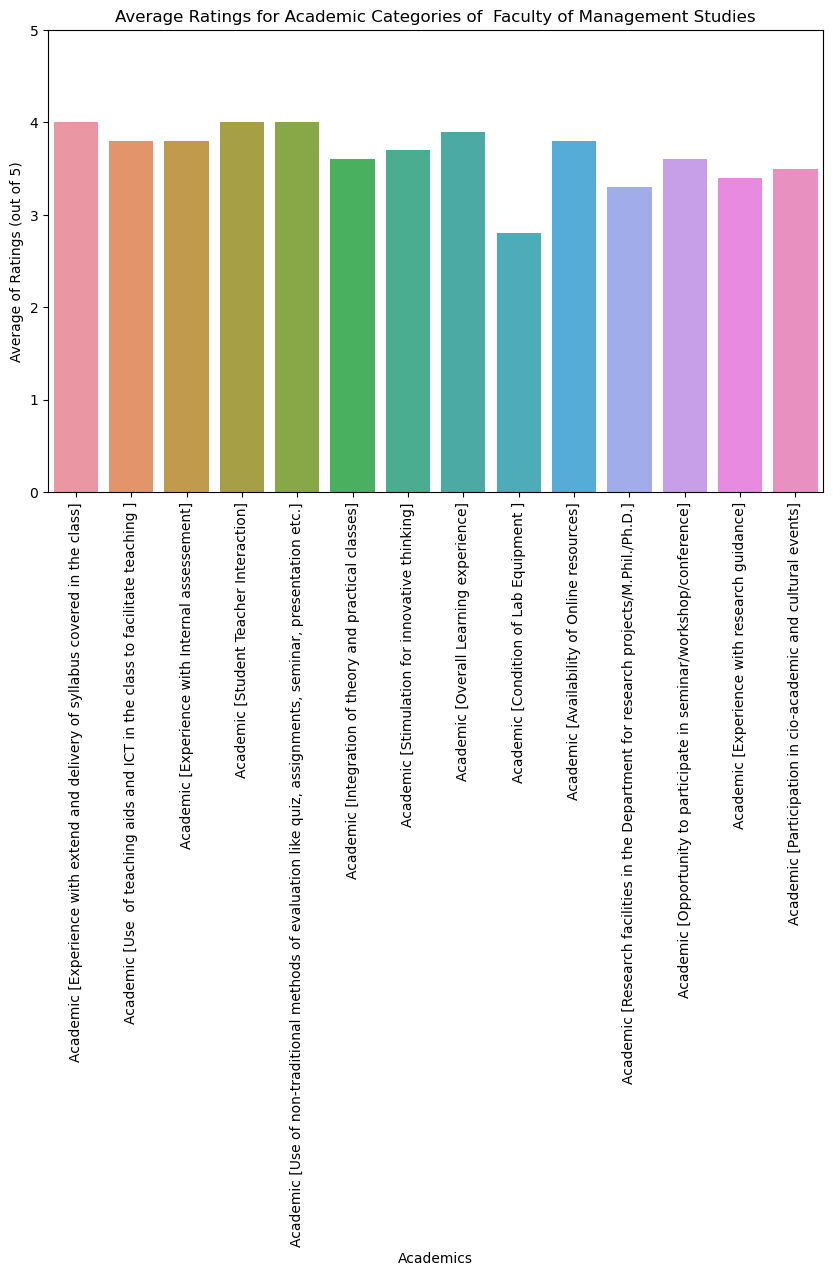

In [73]:

# filleting data for Management Studies
Management_Studies=df_ajay[df_ajay['Faculty of Your study']=='Management Studies']


# checking
Management_Studies['Faculty of Your study'].unique()

mean_list_Management_Studies=[]
for i in list_of_acd:
  x_Management_Studies=round(Management_Studies[i].mean(),1)
  mean_list_Management_Studies.append(x_Management_Studies)
mean_list_Management_Studies

plt.figure(figsize=(10, 6))


sb.barplot(x=list_of_acd, y=mean_list_Management_Studies)

# Setting plot labels and title
plt.xlabel('Academics')
plt.ylabel('Average of Ratings (out of 5)')
plt.title('Average Ratings for Academic Categories of  Faculty of Management Studies')



# Seting the yaxis range from 0 to 5
plt.ylim(0, 5)

# Rotating the y-axis labels to be vertical as it was overlapinfg in star
plt.xticks(rotation=90)


plt.show()

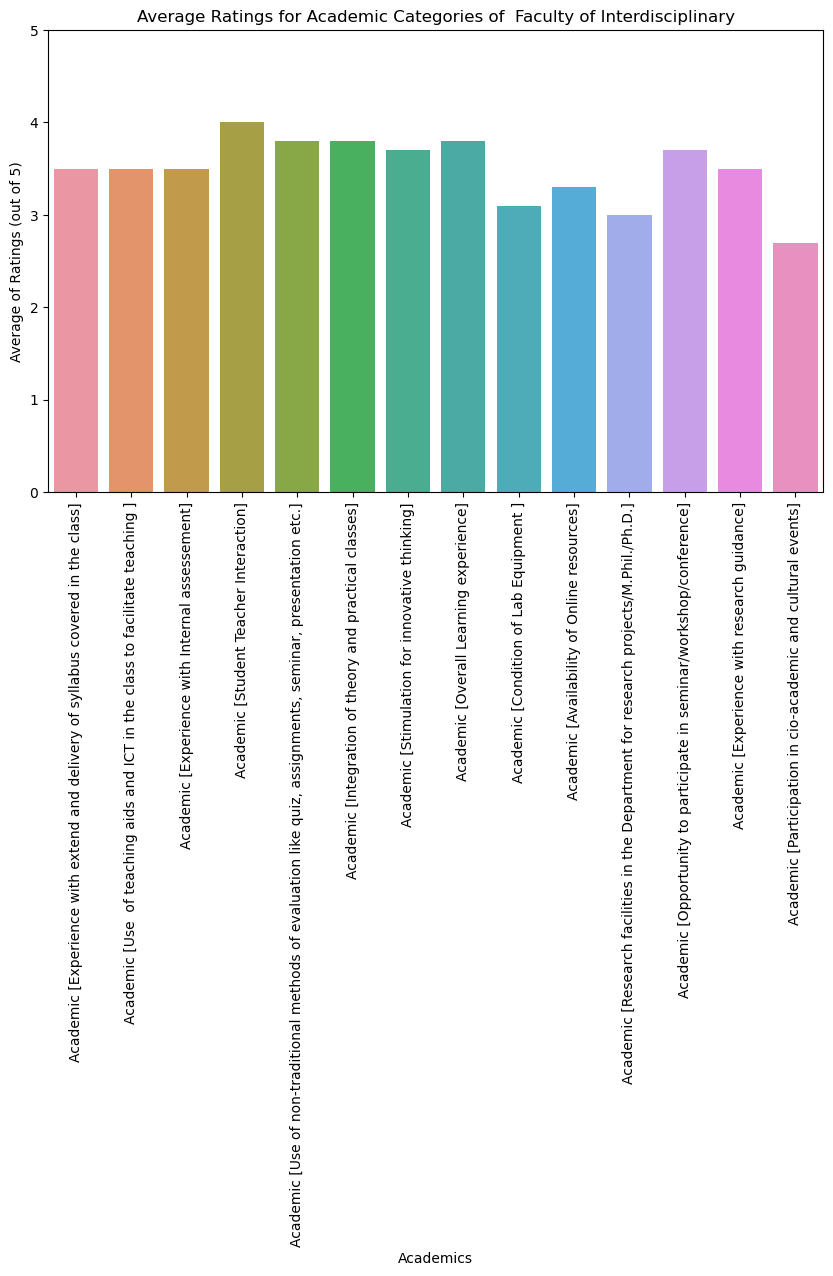

In [74]:

# filleting data for Interdisciplinary
Interdisciplinary=df_ajay[df_ajay['Faculty of Your study']=='Interdisciplinary']


# checking
Interdisciplinary['Faculty of Your study'].unique()

mean_list_Interdisciplinary=[]
for i in list_of_acd:
  x_Interdisciplinary=round(Interdisciplinary[i].mean(),1)
  mean_list_Interdisciplinary.append(x_Interdisciplinary)
mean_list_Interdisciplinary

plt.figure(figsize=(10, 6))


sb.barplot(x=list_of_acd, y=mean_list_Interdisciplinary)

# Setting plot labels and title
plt.xlabel('Academics')
plt.ylabel('Average of Ratings (out of 5)')
plt.title('Average Ratings for Academic Categories of  Faculty of Interdisciplinary')



# Seting the yaxis range from 0 to 5
plt.ylim(0, 5)

# Rotating the y-axis labels to be vertical as it was overlapinfg in star
plt.xticks(rotation=90)


plt.show()

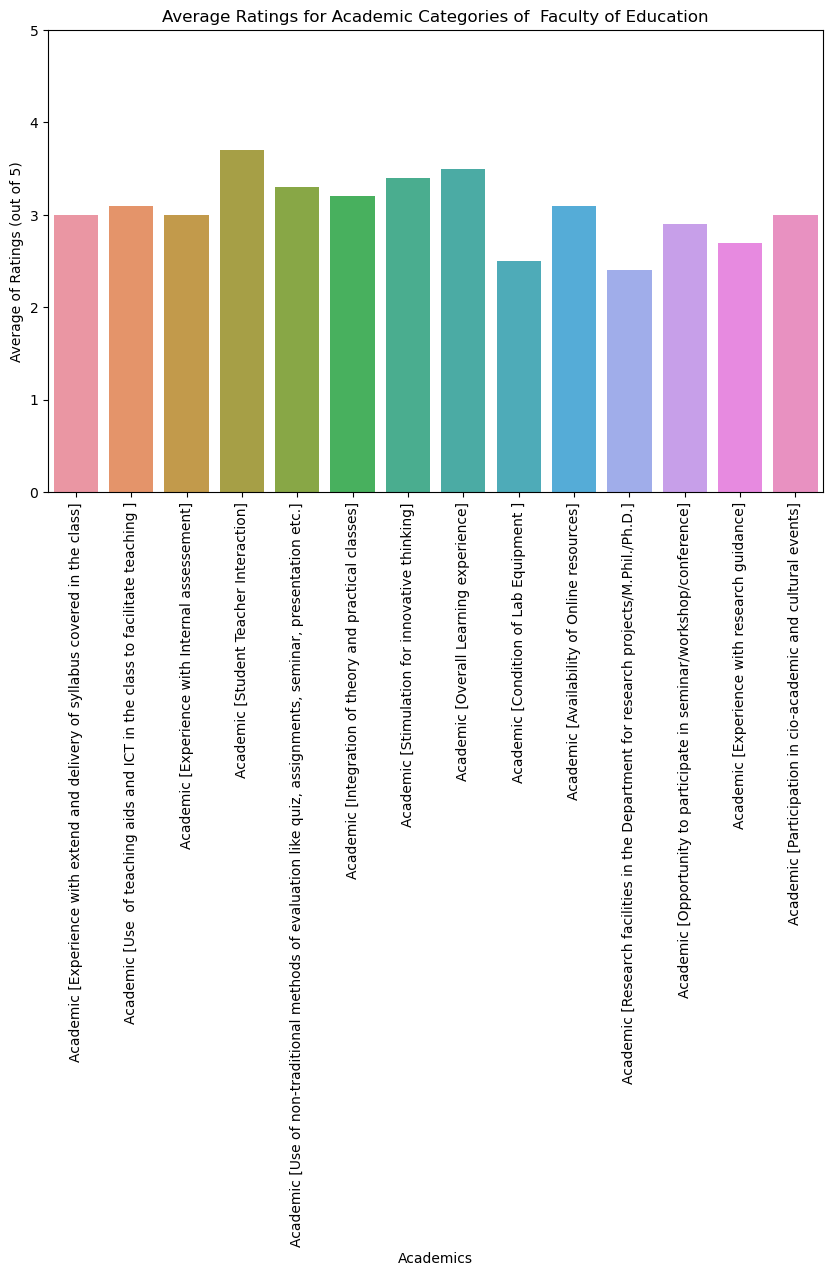

In [75]:

# filleting data for Education
Education=df_ajay[df_ajay['Faculty of Your study']=='Education']


# checking
Education['Faculty of Your study'].unique()

mean_list_Education=[]
for i in list_of_acd:
  x_Education=round(Education[i].mean(),1)
  mean_list_Education.append(x_Education)
mean_list_Education

plt.figure(figsize=(10, 6))


sb.barplot(x=list_of_acd, y=mean_list_Education)

# Setting plot labels and title
plt.xlabel('Academics')
plt.ylabel('Average of Ratings (out of 5)')
plt.title('Average Ratings for Academic Categories of  Faculty of Education')



# Seting the yaxis range from 0 to 5
plt.ylim(0, 5)

# Rotating the y-axis labels to be vertical as it was overlapinfg in star
plt.xticks(rotation=90)


plt.show()

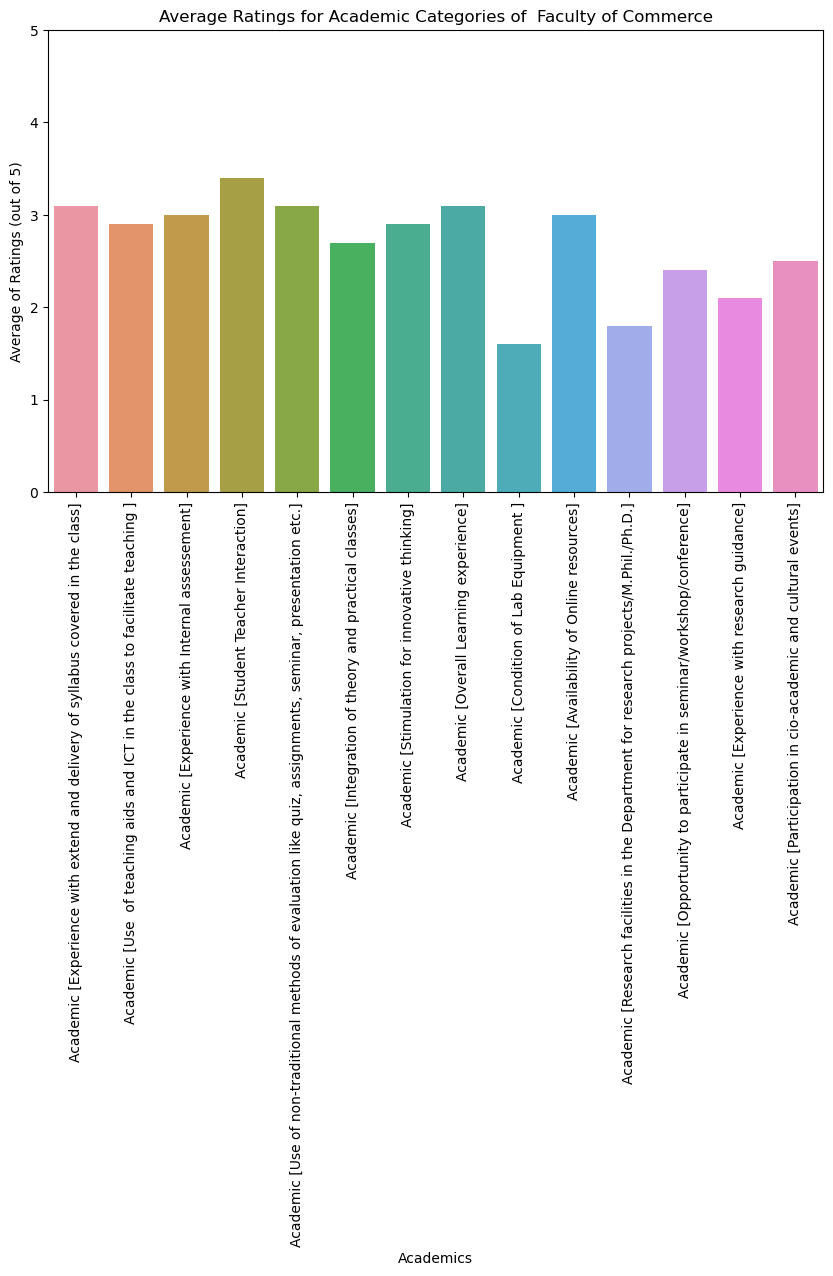

In [76]:
# filleting data for Commerce
Commerce=df_ajay[df_ajay['Faculty of Your study']=='Commerce']


# checking
Commerce['Faculty of Your study'].unique()

mean_list_Commerce=[]
for i in list_of_acd:
  x_Commerce=round(Commerce[i].mean(),1)
  mean_list_Commerce.append(x_Commerce)
mean_list_Commerce

plt.figure(figsize=(10, 6))

sb.barplot(x=list_of_acd, y=mean_list_Commerce)

# Setting plot labels and title
plt.xlabel('Academics')
plt.ylabel('Average of Ratings (out of 5)')
plt.title('Average Ratings for Academic Categories of  Faculty of Commerce')

# Seting the yaxis range from 0 to 5
plt.ylim(0, 5)

# Rotating the y-axis labels to be vertical as it was overlapinfg in star
plt.xticks(rotation=90)
plt.show()

## Rohan
 - Mean Sentiments Bar Graph of different types
 - Scatter Plit of all the sentiment score
 - Heatmap of Department and Category

In [77]:
programme_counts = df1['Programme of Study'].value_counts()
programme_counts

Masters    1697
UG          259
Ph.D        249
M.Phil       60
Name: Programme of Study, dtype: int64

In [78]:
programme_counts = df1['Programme of Study'].value_counts()
programme_counts

Masters    1697
UG          259
Ph.D        249
M.Phil       60
Name: Programme of Study, dtype: int64

In [79]:
gender_counts = df1['Gender'].value_counts()
gender_counts

Female    1242
Male      1021
Others       2
Name: Gender, dtype: int64

In [80]:
from textblob import TextBlob
#from newspaper import Article
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\areeb\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\areeb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [81]:
tempdf=df.copy()     #Creating a new dataframe
tempdf['Sentiment Score']=""    #New column to store the sentiments

In [82]:
i=-1
for colname,colval in df['Suggestions, if any:'].iteritems():
    text=str(colval)
    blob=TextBlob(text)
    sentiment=blob.sentiment.polarity  # -1 to 1
    i+=1
    tempdf.at[i,'Sentiment Score']=sentiment    #Adding the sentiments to new column values

C:\Users\areeb\AppData\Local\Temp\ipykernel_20316\3190060431.py:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for colname,colval in df['Suggestions, if any:'].iteritems():


In [83]:
tempdf['Sentiment Score'] = pd.to_numeric(tempdf['Sentiment Score'])

# Round the values in the "Sentiment Score" column to 1 decimal place
tempdf['Sentiment Score'] = tempdf['Sentiment Score'].round(1)

In [84]:
tempdf.drop(tempdf[tempdf['Suggestions, if any:'].isnull()].index, inplace=True)   #Droping NULL value rows

In [85]:
tempdf['Sentiment Score'].mean()

0.1684341859014348

In [86]:
# Department wise Sentiments segregation
dept = ['Political Science', 'chemistry', 'music', 'commerce', 'law', 'economics', 'Social Work', 'Computer Science']

pol_sci_df= tempdf[tempdf[' Name of the Department ']=='Political Science']
print("Pol Sci- ",pol_sci_df['Sentiment Score'].mean().round(2),"\n")

chem_df=tempdf[tempdf[' Name of the Department ']=='chemistry']
print("Chemistry- ",chem_df['Sentiment Score'].mean().round(2),"\n")

music_df=tempdf[tempdf[' Name of the Department ']=='music']
print("Music- ",music_df['Sentiment Score'].mean().round(2),"\n")

comm_df=tempdf[tempdf[' Name of the Department ']=='commerce']
print("Commerce- ",comm_df['Sentiment Score'].mean().round(2),"\n")

law_df=tempdf[tempdf[' Name of the Department ']=='law']
print("Law- ",law_df['Sentiment Score'].mean().round(2),"\n")

eco_df=tempdf[tempdf[' Name of the Department ']=='economics']
print("Economics- ",eco_df['Sentiment Score'].mean().round(2),"\n")

sw_df=tempdf[tempdf[' Name of the Department ']=='Social Work']
print("Social work- ",sw_df['Sentiment Score'].mean().round(2),"\n")

cs_df=tempdf[tempdf[' Name of the Department ']=='Computer Science']
print("Computer Science- ",cs_df['Sentiment Score'].mean())

Pol Sci-  0.13 

Chemistry-  0.15 

Music-  0.23 

Commerce-  0.14 

Law-  0.18 

Economics-  0.17 

Social work-  0.15 

Computer Science-  0.15217391304347824


In [87]:
#Sentiment segregation on Residence

pg_df=tempdf[tempdf['Residence']== 'PG/Rented']
print("PG- ",pg_df['Sentiment Score'].mean().round(2))

host_df=tempdf[tempdf['Residence']=='Hostel']
print("Hostel- ",host_df['Sentiment Score'].mean().round(2))

loc_df=tempdf[tempdf['Residence']== 'Local']
print("Local- ",loc_df['Sentiment Score'].mean().round(2))

ncr_df=tempdf[tempdf['Residence']== 'NCR']
print("NCR- ",ncr_df['Sentiment Score'].mean().round(2))


PG-  0.17
Hostel-  0.18
Local-  0.16
NCR-  0.19


Text(0.5, 1.0, 'Mean Sentiment Score by Categories')

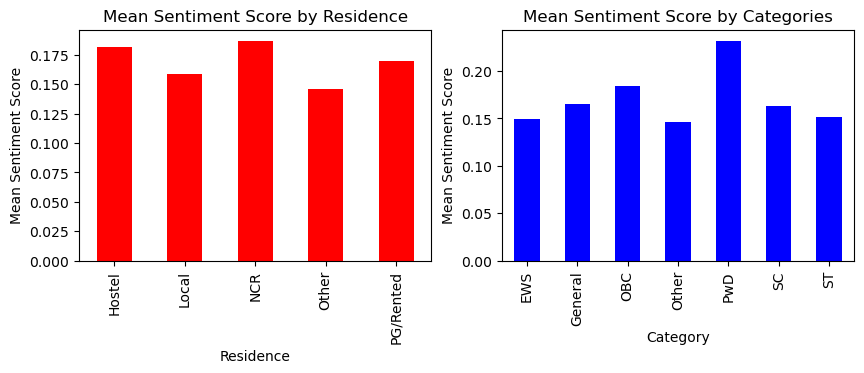

In [88]:
residence_sentiment_mean = tempdf.groupby('Residence')['Sentiment Score'].mean()

# Plot the bar graph

plt.figure(figsize=(10, 3))  # Optional: Adjust the figure size

plt.subplot(1,2, 1)

residence_sentiment_mean.plot(kind='bar', color='red')

# Optional: Customize the plot
plt.xlabel('Residence')
plt.ylabel('Mean Sentiment Score')
plt.title('Mean Sentiment Score by Residence')


c_sentiment_mean = tempdf.groupby('Category')['Sentiment Score'].mean()
# Plot the bar graph
# plt.figure(figsize=(6, 3))  # Optional: Adjust the figure size
plt.subplot(1, 2, 2)
c_sentiment_mean.plot(kind='bar', color='blue')

# Optional: Customize the plot
plt.xlabel('Category')
plt.ylabel('Mean Sentiment Score')
plt.title('Mean Sentiment Score by Categories')

The students from NCR and outside Delhi has given more positive feedback as compared to others.
Same with PwD students.

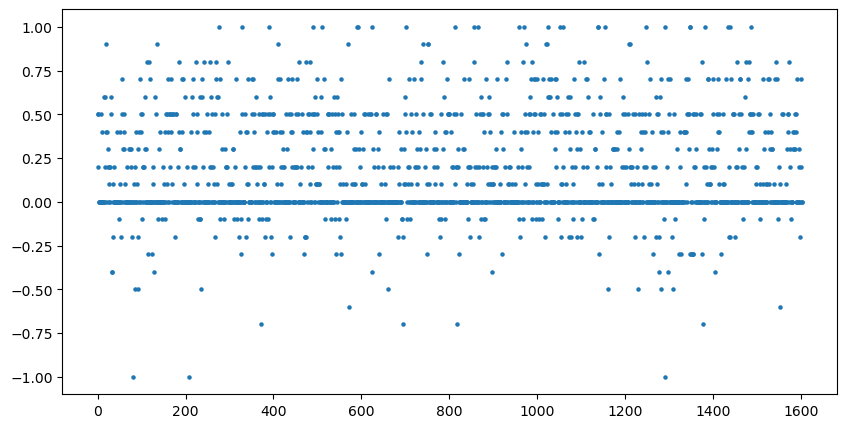

In [89]:
plt.figure(figsize=(10, 5))  # Optional: Adjust the figure size

# Get the sentiment scores and their corresponding indexes
sentiment_scores = tempdf['Sentiment Score']
indexes = range(len(sentiment_scores))

# Plot the scatter plot
plt.scatter(indexes, sentiment_scores,s=5)

Most of the students has given a positive feedback and it shows that more students are on upper side which says that the sentiments while writing suggestions was positive.

<Axes: xlabel='Category', ylabel=' Name of the Department '>

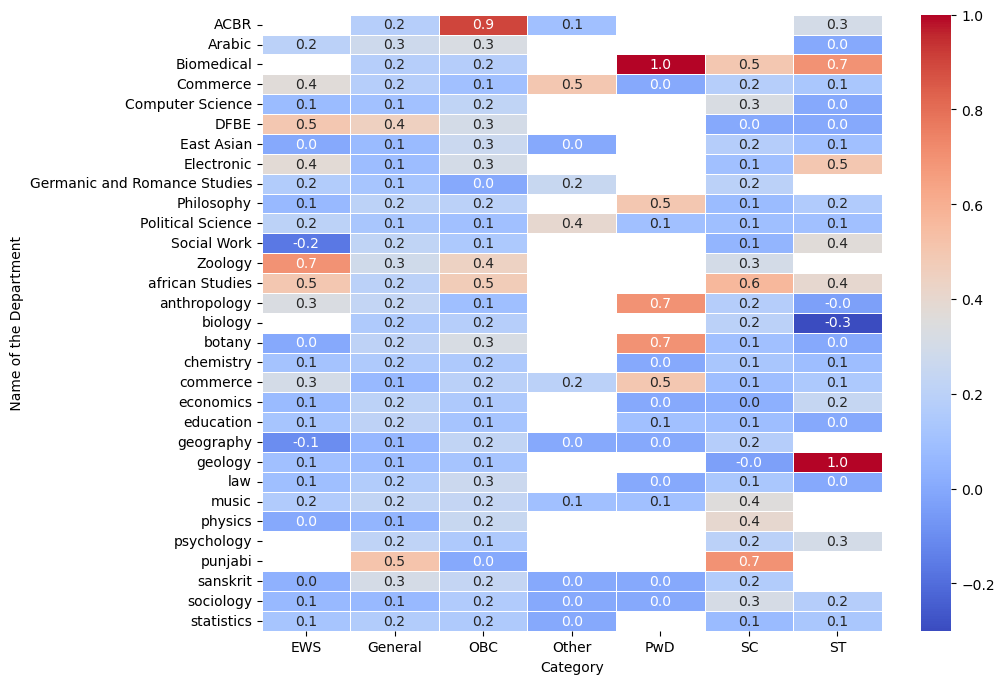

In [90]:
pivot_df = tempdf.pivot_table(index=' Name of the Department ', columns='Category', values='Sentiment Score')

# Plot the heatmap
plt.figure(figsize=(10, 8))  # Optional: Adjust the figure size
sns.heatmap(pivot_df, annot=True, cmap='coolwarm', fmt='.1f', linewidths=0.5)

General- Punjabi, EWS- Zoology, OBC- ACBR, SC- Punjabi , ST- Geology, PwD- Biomedical, Others- Commerce

In [91]:
#To check the correctness of the haetmap above
f_df=tempdf[tempdf['Gender']=='Male' ]
ff_df=f_df[f_df[' Name of the Department ']=='punjabi']
ff_df['Sentiment Score'].mean()

0.9

## Satyandra

*   Analysis on Infrastructre namely Hostel,Classroom,Internet,Library
*   Other one is Support System
*   A violinplot using sns to show the distribution.
*   Also to compare the groups




In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

In [93]:
df2 = df1.copy()
df2.columns

Index(['index', 'Timestamp', 'Programme of Study', 'Faculty of Your study',
       ' Name of the Department ', 'Semester of Study', 'Residence', 'Gender',
       'Category', 'Academic [Content of Syllabi of the courses]',
       'Academic [Experience with extend and delivery of syllabus covered in the class]',
       'Academic [Use  of teaching aids and ICT in the class to facilitate teaching ]',
       'Academic [Experience with Internal assessement]',
       'Academic [Student Teacher Interaction]',
       'Academic [Use of non-traditional methods of evaluation like quiz, assignments, seminar, presentation etc.]',
       'Academic [Integration of theory and practical classes]',
       'Academic [Stimulation for innovative thinking]',
       'Academic [Overall Learning experience]',
       'Academic [Condition of Lab Equipment ]',
       'Academic [Availability of Online resources]',
       'Academic [Research facilities in the Department for research projects/M.Phil./Ph.D.]',
       

In [94]:
#dataframe of program of study and infrastructure rating with count
#grouping data on the basis of hostel facility
grouped1 = df2.groupby(['Programme of Study','Infrastructure [Hostel Facility]']).size().reset_index(name = 'count')
#grouping data on the basis of class room facilities
grouped2 = df2.groupby(['Programme of Study','Infrastructure [Class room Facilities ( LCD/Audio/Computer etc.)]']).size().reset_index(name = 'count')
#grouping data on the basis of Infrastructure [Internet Facility]
grouped3 = df2.groupby(['Programme of Study','Infrastructure [Internet Facility]']).size().reset_index(name = 'count')
#grouping data on the basis of Infrastructure [Libraryu Reading Room Facility]
grouped4 = df2.groupby(['Programme of Study','Infrastructure [Libraryu Reading Room Facility]']).size().reset_index(name = 'count')

In [95]:
rating = {
    5 : ['Excellent'],
    4 : ['Very Good'],
    3 : ['Good'],
    2 : ['Average', 'Averge'],
    1 : ['Below Average'],
    0 : ["Don't Know", "Don't know"],
    -1 : ['Not Applicable', 'Not  Applicable', 'Not applicable'],
}

In [96]:
df1

index                        Timestamp Programme of Study  \
0         0   2022/04/07 6:26:50 PM GMT+5:30            Masters   
1         1   2022/04/07 6:30:06 PM GMT+5:30            Masters   
2         2   2022/04/07 6:30:33 PM GMT+5:30            Masters   
3         3   2022/04/07 6:32:30 PM GMT+5:30            Masters   
4         4   2022/04/07 6:34:41 PM GMT+5:30            Masters   
...     ...                              ...                ...   
2260   2328  2022/06/02 12:39:16 AM GMT+5:30            Masters   
2261   2329   2022/06/03 3:37:21 PM GMT+5:30            Masters   
2262   2330   2022/06/05 1:51:18 PM GMT+5:30            Masters   
2263   2331   2022/06/05 1:51:40 PM GMT+5:30            Masters   
2264   2332   2022/06/08 3:07:24 PM GMT+5:30             M.Phil   

     Faculty of Your study  Name of the Department  Semester of Study  \
0          Social Sciences        Political Science                IV   
1          Social Sciences        Political Science                IV   
2          Social Sciences        Political Science                IV   
3          Social Sciences        Political Science                IV   
4                     Arts        Political Science                IV   
...                    ...                      ...               ...   
2260               Science                chemistry                IV   
2261    Management Studies                     DFBE                 V   
2262               Science                chemistry                IV   
2263               Science                chemistry                IV   
2264       Social Sciences                sociology               III   

      Residence  Gender Category Academic [Content of Syllabi of the courses]  \
0     PG/Rented    Male  General                                    Excellent   
1         Local    Male       SC                                Below Average   
2     PG/Rented    Male      EWS                                    Excellent   
3     PG/Rented    Male      OBC                                    Excellent   
4           NCR  Female      OBC                                      Average   
...         ...     ...      ...                                          ...   
2260  PG/Rented  Female  General                                         Good   
2261  PG/Rented    Male  General                                         Good   
2262  PG/Rented  Female  General                                    Excellent   
2263  PG/Rented  Female       SC                                    Very Good   
2264  PG/Rented    Male       ST                                    Very Good   

      ...  \
0     ...   
1     ...   
2     ...   
3     ...   
4     ...   
...   ...   
2260  ...   
2261  ...   
2262  ...   
2263  ...   
2264  ...   

     Skills developed during course of study [Clarity of Career Perspective]  \
0                                                  Good                        
1                                         Below Average                        
2                                                  Good                        
3                                                  Good                        
4                                                Averge                        
...                                                 ...                        
2260                                               Good                        
2261                                               Good                        
2262                                          Very Good                        
2263                                          Excellent                        
2264                                             Averge                        

     Skills developed during course of study [IT Skills]  \
0                                                  Good    
1                                         Below Average    
2                                                  Go

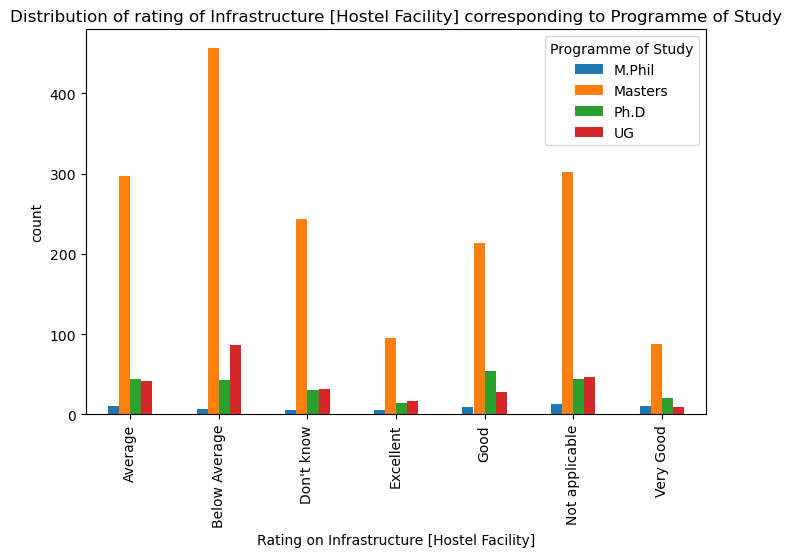

In [97]:
grouped1.pivot(index = 'Infrastructure [Hostel Facility]' , columns = 'Programme of Study',values = 'count').plot(kind = 'bar',figsize = (8,5))
plt.xlabel('Rating on Infrastructure [Hostel Facility]')
plt.ylabel('count')
plt.title('Distribution of rating of Infrastructure [Hostel Facility] corresponding to Programme of Study')

plt.show()


Insights

*   The above graph show the raiting distribution of hostel infrastructure
     spread over different Programme of studies



*    As we can see the highest peak can be seen as on 1 for the Master programme
This trend can be seen for other programme also



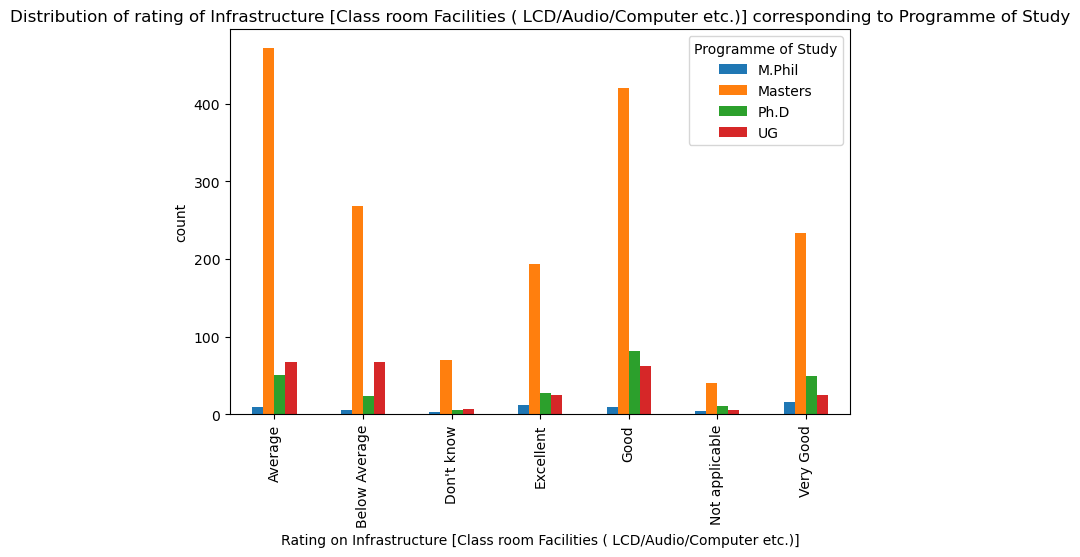

In [98]:
grouped2.pivot(index = 'Infrastructure [Class room Facilities ( LCD/Audio/Computer etc.)]' , columns = 'Programme of Study',values = 'count').plot(kind = 'bar',figsize = (8,5))
plt.xlabel('Rating on Infrastructure [Class room Facilities ( LCD/Audio/Computer etc.)]')
plt.ylabel('count')
plt.title('Distribution of rating of Infrastructure [Class room Facilities ( LCD/Audio/Computer etc.)] corresponding to Programme of Study')
plt.show()

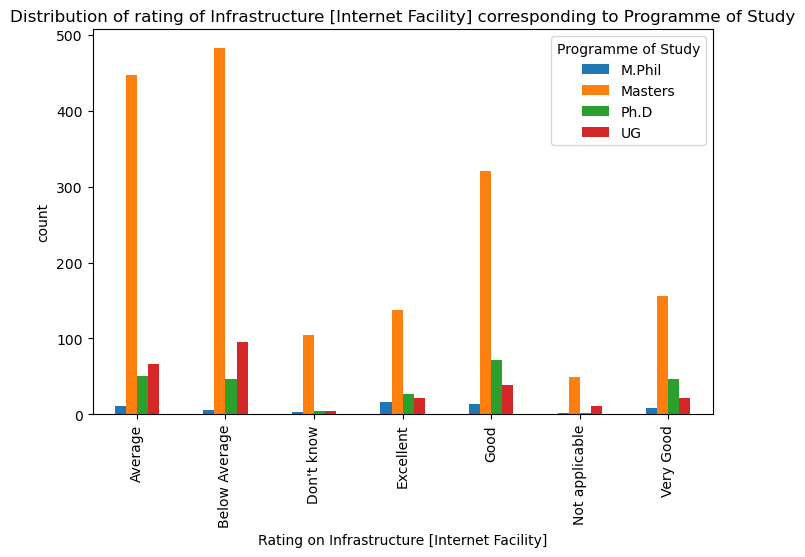

In [99]:
grouped3.pivot(index = 'Infrastructure [Internet Facility]' , columns = 'Programme of Study',values = 'count').plot(kind = 'bar',figsize = (8,5))
plt.xlabel('Rating on Infrastructure [Internet Facility]')
plt.ylabel('count')
plt.title('Distribution of rating of Infrastructure [Internet Facility] corresponding to Programme of Study')
plt.show()

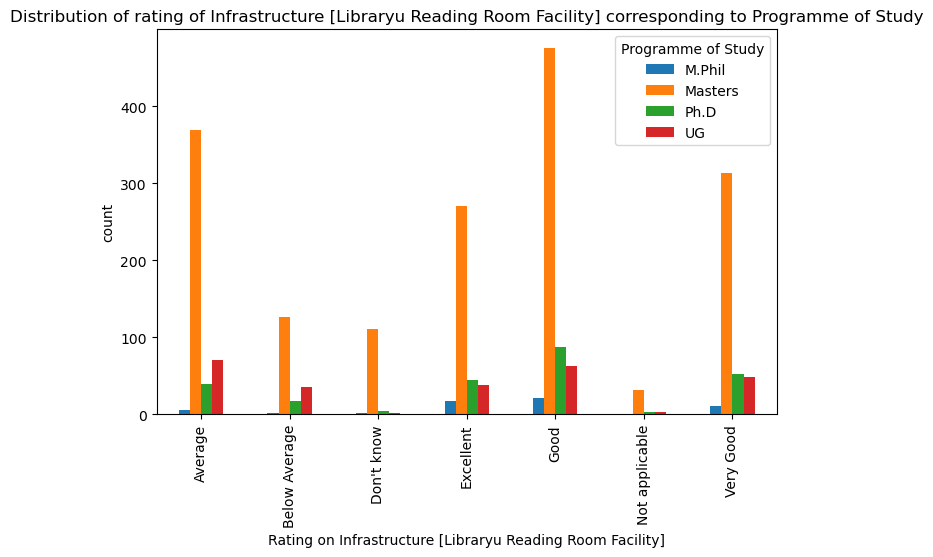

In [100]:
grouped4.pivot(index = 'Infrastructure [Libraryu Reading Room Facility]' , columns = 'Programme of Study',values = 'count').plot(kind = 'bar',figsize = (8,5))
plt.xlabel('Rating on Infrastructure [Libraryu Reading Room Facility]')
plt.ylabel('count')
plt.title('Distribution of rating of Infrastructure [Libraryu Reading Room Facility] corresponding to Programme of Study')
plt.show()

In [101]:
rating = {
    5 : ['Excellent'],
    4 : ['Very Good'],
    3 : ['Good'],
    2 : ['Average', 'Averge'],
    1 : ['Below Average'],
    0 : ["Don't Know", "Don't know"],
    -1 : ['Not Applicable', 'Not  Applicable', 'Not applicable'],
}

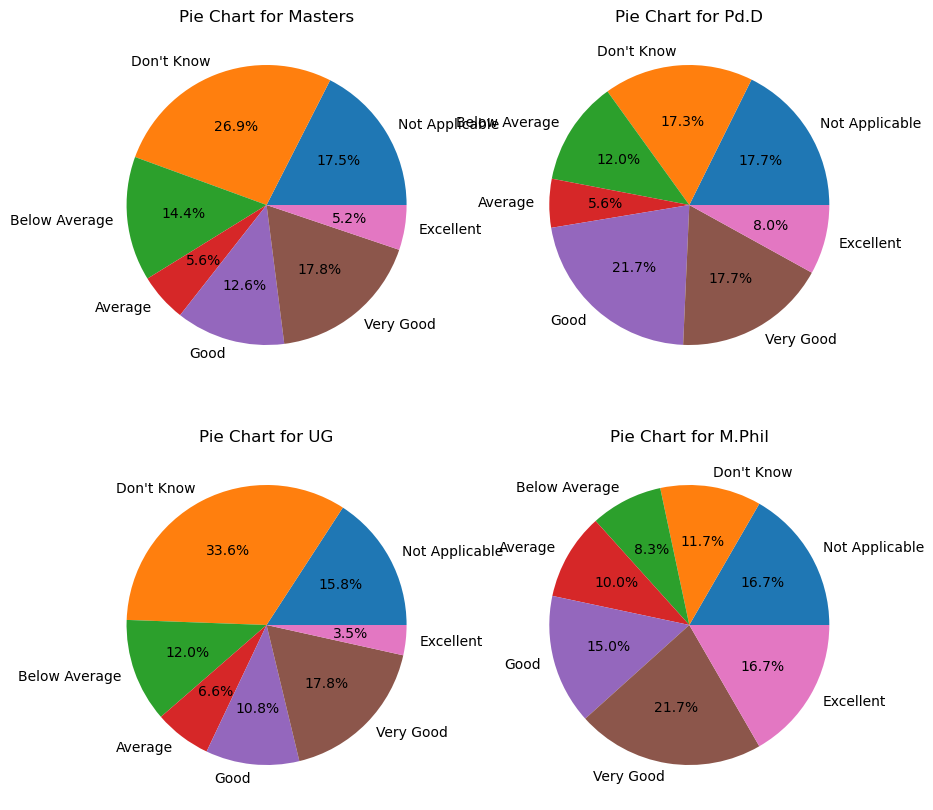

In [102]:
# making grouping on Programme of strudy basis - MAsters
d1 = grouped1[grouped1['Programme of Study'] == 'Masters']
x1 = d1['count']
labels1 = ['Not Applicable',"Don't Know",'Below Average','Average','Good','Very Good','Excellent']

#plotting pie graph
plt.figure(figsize=(10, 10))#making a 2x2 grid
plt.subplot(2,2,1)

#pie plot for Masters
plt.pie(x1,labels = labels1,autopct = '%1.1f%%')
plt.title("Pie Chart for Masters")


d2 = grouped1[grouped1['Programme of Study'] == 'Ph.D']
x2 = d2['count']
labels2 = ['Not Applicable',"Don't Know",'Below Average','Average','Good','Very Good','Excellent']


#plotting pie graph
plt.subplot(2,2,2)

#pie plot for Masters
plt.pie(x2,labels = labels2,autopct = '%1.1f%%')
plt.title("Pie Chart for Pd.D")


d3 = grouped1[grouped1['Programme of Study'] == 'UG']
x3 = d3['count']
labels3 = ['Not Applicable',"Don't Know",'Below Average','Average','Good','Very Good','Excellent']


#plotting pie graph
plt.subplot(2,2,3)

#pie plot for Masters
plt.pie(x3,labels = labels3,autopct = '%1.1f%%')
plt.title("Pie Chart for UG")


d4 = grouped1[grouped1['Programme of Study'] == 'M.Phil']
x4 = d4['count']
labels4 = ['Not Applicable',"Don't Know",'Below Average','Average','Good','Very Good','Excellent']


#plotting pie graph
plt.subplot(2,2,4)

#pie plot for Masters
plt.pie(x4,labels = labels4,autopct = '%1.1f%%')
plt.title("Pie Chart for M.Phil")
plt.show()

Insights


*   As we can see for masters and ug the percentage is more towrards the below average side.So we can say that by seeing the data that hostel infrastructure is not as good as for the Ph.d or M.phil students.
*   Good and very good percentage is very high for the Ph.d and M.phil students so the hostel infra is good over there



In [103]:
df1['Support System [Experience of the admission process to the programme you have enrolled in]'].value_counts()

Good               818
Very Good          488
Excellent          425
Average            391
Below Average      134
Don't Know           5
Not  Applicable      4
Name: Support System [Experience of the admission process to the programme you have enrolled in], dtype: int64

In [104]:
df1['Faculty of Your study'].value_counts()#taking the count doing for top6 enteries

Science                  633
Social Sciences          457
Arts                     430
Mathematical Sciences    161
Music and Fine Arts      151
Management Studies       138
Commerce                 111
Law                       95
Education                 67
Interdisciplinary         22
Name: Faculty of Your study, dtype: int64

In [105]:
cnt = df2['Faculty of Your study'].value_counts()
condition = df2['Faculty of Your study'].isin(cnt[cnt > 137].index)
print(condition)
df3 = df2[condition].copy()#copying according to the condition
faculty = df['Faculty of Your study']
ss = df['Support System [Experience of the admission process to the programme you have enrolled in]']

0       True
1       True
2       True
3       True
4       True
        ... 
2260    True
2261    True
2262    True
2263    True
2264    True
Name: Faculty of Your study, Length: 2265, dtype: bool


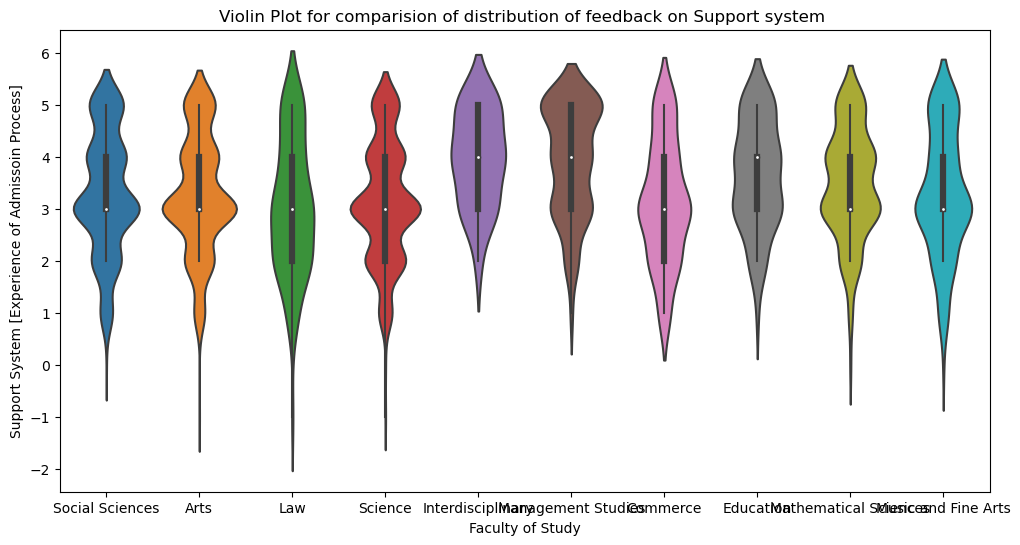

In [106]:
plt.figure(figsize=(12, 6))
sns.violinplot(x = faculty,y = ss,data = df3)
plt.xlabel('Faculty of Study')
plt.ylabel('Support System [Experience of Admissoin Process]')
plt.title('Violin Plot for comparision of distribution of feedback on Support system ')
plt.show()



*   So the above chart suggest that for Social Science,Arts, Science,Mathematical Sciences,Music and Fine Arts the density or distribution shifts to the average side.
*   Except for the Management Studies its average goes to the around 5 rating i.e.Excellent



In [107]:
df2['Support System [Experience of the admission process to the programme you have enrolled in]'].value_counts()

Good               818
Very Good          488
Excellent          425
Average            391
Below Average      134
Don't Know           5
Not  Applicable      4
Name: Support System [Experience of the admission process to the programme you have enrolled in], dtype: int64

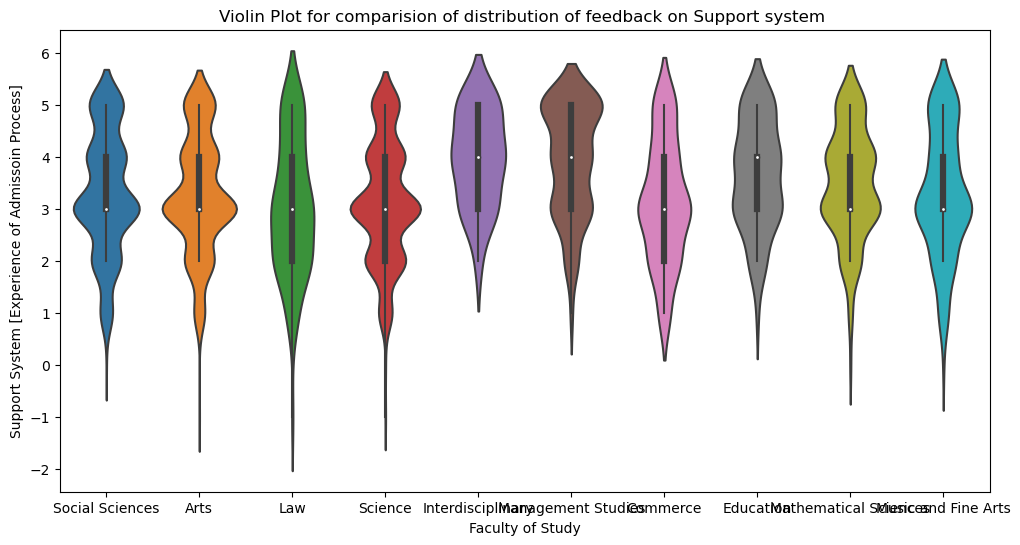

In [108]:
ss1 = df['Support System [Experience of the admission process to the programme you have enrolled in]']
plt.figure(figsize=(12, 6))
sns.violinplot(x = faculty,y = ss1,data = df2)
plt.xlabel('Faculty of Study')
plt.ylabel('Support System [Experience of Admissoin Process]')
plt.title('Violin Plot for comparision of distribution of feedback on Support system ')
plt.show()